In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv('/home/matsuo/semi_3_1/kyoto_restaurant_final.csv',encoding='shift_jis')

data=pd.DataFrame(data)
data = data[data['middle_area.code'] != 'Y437']
data = data[data['middle_area.code'] != 'Y869']
data=data[data['wifi']!='未確認']
data=data[data['non_smoking']!='未確認']

print(type(data))
data['credit_card']=data['credit_card'].str.replace(" {'code': 'c12', 'name': 'Discover'}",'Dis')
print(data[0:5])

<class 'pandas.core.frame.DataFrame'>
   band  barrier_free  capacity  card  charter  child  course  \
0     0             0     100.0     1        1      1       1   
1     0             0      42.0     0        1      1       1   
2     0             0      34.0     1        0      2       1   
3     1             0     130.0     0        1      0       1   
4     0             0     170.0     1        0      2       1   

       credit_card  english  free_drink  ...  tatami  tv  wifi  budget.code  \
0      [V,M,A,D,J]        1           1  ...       1   0     0       2500.0   
1              NaN        0           1  ...       1   0     0       2500.0   
2  [V,M,A,D,J,Dis]        0           0  ...       1   1     1       2500.0   
3              NaN        1           1  ...       0   1     0       1750.0   
4            [V,M]        1           1  ...       1   0     0       2500.0   

   genre.code  large_area.code  large_service_area.code  middle_area.code  \
0     焼肉・ホルモン      

In [3]:
data.isnull().any(axis=0)

band                       False
barrier_free               False
capacity                    True
card                       False
charter                    False
child                      False
course                     False
credit_card                 True
english                    False
free_drink                 False
free_food                  False
horigotatsu                False
karaoke                    False
ktai_coupon                False
lat                        False
lng                        False
lunch                      False
midnight                   False
non_smoking                False
parking                    False
party_capacity              True
pet                        False
private_room               False
show                       False
tatami                     False
tv                         False
wifi                       False
budget.code                 True
genre.code                 False
large_area.code            False
large_serv

In [4]:
data=data.dropna(subset=['capacity','party_capacity','budget.code'])

In [5]:
data.isnull().any(axis=0)

band                       False
barrier_free               False
capacity                   False
card                       False
charter                    False
child                      False
course                     False
credit_card                 True
english                    False
free_drink                 False
free_food                  False
horigotatsu                False
karaoke                    False
ktai_coupon                False
lat                        False
lng                        False
lunch                      False
midnight                   False
non_smoking                False
parking                    False
party_capacity             False
pet                        False
private_room               False
show                       False
tatami                     False
tv                         False
wifi                       False
budget.code                False
genre.code                 False
large_area.code            False
large_serv

In [6]:
data.info()
print(len(data))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808 entries, 0 to 2952
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   band                     1808 non-null   int64  
 1   barrier_free             1808 non-null   int64  
 2   capacity                 1808 non-null   float64
 3   card                     1808 non-null   int64  
 4   charter                  1808 non-null   int64  
 5   child                    1808 non-null   int64  
 6   course                   1808 non-null   int64  
 7   credit_card              1337 non-null   object 
 8   english                  1808 non-null   int64  
 9   free_drink               1808 non-null   int64  
 10  free_food                1808 non-null   int64  
 11  horigotatsu              1808 non-null   int64  
 12  karaoke                  1808 non-null   int64  
 13  ktai_coupon              1808 non-null   int64  
 14  lat                     

In [7]:
band=data.iloc[:,0]
barrier_free=data.iloc[:,1]
capacity=data.iloc[:,2]
card=data.iloc[:,3]
charter=data.iloc[:,4]
child=data.iloc[:,5]
course=data.iloc[:,6]
credit_card=data.iloc[:,7]
english=data.iloc[:,8]
free_drink=data.iloc[:,9]
free_food=data.iloc[:,10]
horigotatu=data.iloc[:,11]
karaoke=data.iloc[:,12]
ktai_coupon=data.iloc[:,13]
lat=data.iloc[:,14]
lng=data.iloc[:,15]
lunch=data.iloc[:,16]
midnight=data.iloc[:,17]
non_smoking=data.iloc[:,18]
parking=data.iloc[:,19]
party_capacity=data.iloc[:,20]
pet=data.iloc[:,21]
private_room=data.iloc[:,22]
show=data.iloc[:,23]
tatami=data.iloc[:,24]
tv=data.iloc[:,25]
wifi=data.iloc[:,26]
budget=data.iloc[:,27]
genre=data.iloc[:,28]
large_area=data.iloc[:,29]
large_survice=data.iloc[:,30]
middle_area=data.iloc[:,31]
service=data.iloc[:,32]
small_area=data.iloc[:,33]

In [8]:
budget=budget.astype(int)
print(budget)
print(type(budget))
print(data[0:10])

0        2500
1        2500
2        2500
3        1750
4        2500
        ...  
2946     6000
2947     6000
2948     3500
2951    12500
2952     1750
Name: budget.code, Length: 1808, dtype: int64
<class 'pandas.core.series.Series'>
   band  barrier_free  capacity  card  charter  child  course  \
0     0             0     100.0     1        1      1       1   
1     0             0      42.0     0        1      1       1   
2     0             0      34.0     1        0      2       1   
3     1             0     130.0     0        1      0       1   
4     0             0     170.0     1        0      2       1   
5     1             0      32.0     1        1      1       1   
6     0             0      89.0     1        1      1       1   
7     0             0     200.0     1        0      1       1   
8     0             0      40.0     1        1      2       1   
9     0             1     200.0     1        0      2       1   

       credit_card  english  free_drink  ...  ta

In [9]:
import geocoder
location_kyoto='京都駅'
location_kawaramati='京都河原町駅'
location_sanjo='京阪三条'

address_kyoto=geocoder.osm(location_kyoto)
print(address_kyoto.latlng)
address_kawaramati=geocoder.osm(location_kawaramati)
print(address_kawaramati.latlng)
address_sanjo=geocoder.osm(location_sanjo)
print(address_sanjo.latlng)

[35.021041, 135.7556075]
[35.0036911, 135.7688183]
[35.6729957, 139.7449544]


In [10]:
import numpy as np

from geopy.distance import geodesic
distance_kyoto=[]
distance_kawaramchi=[]
distance_sanjo=[]

for x,y in zip(lat,lng):
    location=np.array([x,y])
    distance_kyoto.append(geodesic(address_kyoto.latlng,location).m)
    distance_kawaramchi.append(geodesic(address_kawaramati.latlng,location).m)
    distance_sanjo.append(geodesic(address_sanjo.latlng,location).m)
data['distance_kyoto']=distance_kyoto
data['distance_kawaramachi']=distance_kawaramchi
data['distance_sanjo']=distance_sanjo
print(data.distance_kyoto)
print(data.distance_kawaramachi)
print(data.distance_sanjo)

0       2040.004586
1       2010.961375
2       2629.381933
3       1907.052324
4       2231.750767
           ...     
2946    1281.733019
2947    1719.126719
2948    1490.696862
2951    1662.785426
2952    1723.148608
Name: distance_kyoto, Length: 1808, dtype: float64
0        320.902559
1        428.101014
2        566.607575
3        365.666056
4        152.136909
           ...     
2946    1461.362110
2947     915.143141
2948    1035.586149
2951    1063.378881
2952     557.307751
Name: distance_kawaramachi, Length: 1808, dtype: float64
0       368874.926855
1       368787.256066
2       369333.426250
3       369086.411418
4       368870.711098
            ...      
2946    368683.996000
2947    368626.800119
2948    368775.278181
2951    368565.012124
2952    369258.311227
Name: distance_sanjo, Length: 1808, dtype: float64


In [11]:
data.distance_kyoto
print(data.distance_kawaramachi)
print(data.distance_sanjo)

0        320.902559
1        428.101014
2        566.607575
3        365.666056
4        152.136909
           ...     
2946    1461.362110
2947     915.143141
2948    1035.586149
2951    1063.378881
2952     557.307751
Name: distance_kawaramachi, Length: 1808, dtype: float64
0       368874.926855
1       368787.256066
2       369333.426250
3       369086.411418
4       368870.711098
            ...      
2946    368683.996000
2947    368626.800119
2948    368775.278181
2951    368565.012124
2952    369258.311227
Name: distance_sanjo, Length: 1808, dtype: float64


In [12]:
print(budget[0:5])
print(distance_kyoto[0:5])

0    2500
1    2500
2    2500
3    1750
4    2500
Name: budget.code, dtype: int64
[2040.0045862240188, 2010.9613748952252, 2629.381932760266, 1907.0523241186781, 2231.7507672132315]


In [13]:
distance_kawaramachi=data.distance_kawaramachi

In [14]:
import seaborn as sns
budget=pd.DataFrame(budget)
distance_kyoto=pd.DataFrame(distance_kyoto)
distance_kawaramachi=pd.DataFrame(distance_kawaramachi)
distance_sanjo=pd.DataFrame(distance_sanjo)
equation_kyoto=pd.concat([budget,distance_kyoto],axis=1)
equation_kyoto.columns=['budget.code','distance_kyoto']
equation_kawaramachi=pd.concat([budget,distance_kawaramachi],axis=1)
equation_kawaramachi.columns=['budget.code','distance_kawaramachi']
equation_sanjo=pd.concat([budget,distance_sanjo],axis=1)
equation_sanjo.columns=['budget.code','distance_sanjo']
print(equation_kyoto)
print(equation_kyoto.columns)


      budget.code  distance_kyoto
0          2500.0     2040.004586
1          2500.0     2010.961375
2          2500.0     2629.381933
3          1750.0     1907.052324
4          2500.0     2231.750767
...           ...             ...
2946       6000.0             NaN
2947       6000.0             NaN
2948       3500.0             NaN
2951      12500.0             NaN
2952       1750.0             NaN

[2329 rows x 2 columns]
Index(['budget.code', 'distance_kyoto'], dtype='object')


      budget.code  distance_kyoto
0          2500.0     2040.004586
1          2500.0     2010.961375
2          2500.0     2629.381933
3          1750.0     1907.052324
4          2500.0     2231.750767
...           ...             ...
2946       6000.0             NaN
2947       6000.0             NaN
2948       3500.0             NaN
2951      12500.0             NaN
2952       1750.0             NaN

[2329 rows x 2 columns]


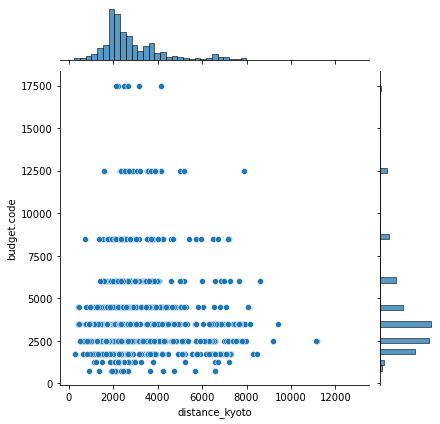

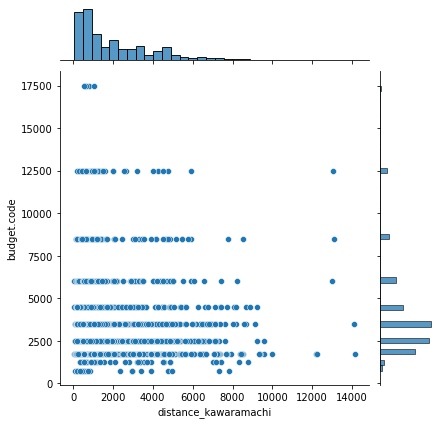

In [15]:
import seaborn as sns
print(equation_kyoto)
sns.jointplot(y='budget.code', x='distance_kyoto',data=equation_kyoto)
sns.jointplot(y='budget.code', x='distance_kawaramachi',data=equation_kawaramachi)
#sns.jointplot(y='budget.code', x='distance_sanjo',data=equation_sanjo)

In [16]:
data[0:5]

,band,barrier_free,capacity,card,charter,child,course,credit_card,english,free_drink,...,budget.code,genre.code,large_area.code,large_service_area.code,middle_area.code,service_area.code,small_area.code,distance_kyoto,distance_kawaramachi,distance_sanjo
0,0,0,100.0,1,1,1,1,"[V,M,A,D,J]",1,1,...,2500.0,焼肉・ホルモン,Z022,SS20,Y432,SA22,X430,2040.004586,320.902559,368874.926855
1,0,0,42.0,0,1,1,1,NaN,0,1,...,2500.0,韓国料理,Z022,SS20,Y432,SA22,X430,2010.961375,428.101014,368787.256066
2,0,0,34.0,1,0,2,1,"[V,M,A,D,J,Dis]",0,0,...,2500.0,韓国料理,Z022,SS20,Y432,SA22,X430,2629.381933,566.607575,369333.426250
3,1,0,130.0,0,1,0,1,NaN,1,1,...,1750.0,ダイニングバー・バル,Z022,SS20,Y432,SA22,X430,1907.052324,365.666056,369086.411418
4,0,0,170.0,1,0,2,1,"[V,M]",1,1,...,2500.0,居酒屋,Z022,SS20,Y432,SA22,X430,2231.750767,152.136909,368870.711098


In [17]:
#!pip install folium

In [18]:
import folium
from folium.plugins import HeatMap

places=pd.concat([lat,lng],axis=1)

map_heatmap=folium.Map(location=address_kyoto.latlng,zoom_start=10)
HeatMap(places,radius=6,blur=5).add_to(map_heatmap)
map_heatmap.save('map_heatmap.html')

In [19]:
print(max(data.distance_kyoto))
print(max(data.lat))
print(min(data.lat))
print(max(data.lng))
print(min(data.lng))

12898.657680522376
35.12352146
34.95325892
135.8253009
135.6675812


In [20]:
import statsmodels.api as sm
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression

<AxesSubplot:>

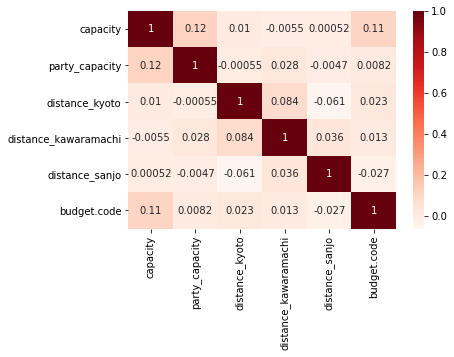

In [21]:
#plt.figure(figsize=(12,9))
equation1=pd.concat([data['capacity'],data['party_capacity'],data['distance_kyoto'],
                     data['distance_kawaramachi'],data['distance_sanjo'],data['budget.code']],axis=1)
sns.heatmap(equation1.pct_change().corr(),annot=True,cmap='Reds')

In [22]:
print(data['middle_area.code'].unique())
print(data['genre.code'].unique())

['Y432' 'Y365' 'Y433' 'Y431' 'Y435' 'Y434' 'Y430']
['焼肉・ホルモン' '韓国料理' 'ダイニングバー・バル' '居酒屋' 'イタリアン・フレンチ' 'カフェ・スイーツ' '和食'
 'お好み焼き・もんじゃ' 'アジア・エスニック' '各国料理' '洋食' '創作料理' '中華' 'カラオケ・パーティー' 'ラーメン'
 'バー・カクテル' 'その他']


In [23]:
print(data.distance_kyoto)

0       2040.004586
1       2010.961375
2       2629.381933
3       1907.052324
4       2231.750767
           ...     
2946    1281.733019
2947    1719.126719
2948    1490.696862
2951    1662.785426
2952    1723.148608
Name: distance_kyoto, Length: 1808, dtype: float64


In [24]:
'''budget=data['budget.code']
x_list=equation1.drop(data['budget.code'],1)
model=sm.OLS(budget,sm.add_constant(x_list))
result=model.fit()
print(result.summary())
print(result.pvalues)'''

"budget=data['budget.code']\nx_list=equation1.drop(data['budget.code'],1)\nmodel=sm.OLS(budget,sm.add_constant(x_list))\nresult=model.fit()\nprint(result.summary())\nprint(result.pvalues)"

In [25]:
data['distance_kyoto']

0       2040.004586
1       2010.961375
2       2629.381933
3       1907.052324
4       2231.750767
           ...     
2946    1281.733019
2947    1719.126719
2948    1490.696862
2951    1662.785426
2952    1723.148608
Name: distance_kyoto, Length: 1808, dtype: float64

/home/matsuo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance_kyoto', ylabel='Density'>

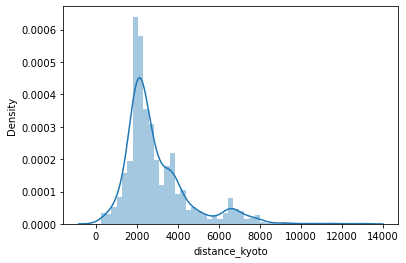

In [26]:
sns.distplot(data.distance_kyoto)

              band  barrier_free     capacity    card      charter  \
count  1337.000000   1337.000000  1337.000000  1337.0  1337.000000   
mean      0.034405      0.122663    59.716530     1.0     0.421092   
std       0.182336      0.328172    63.414268     0.0     0.493919   
min       0.000000      0.000000     1.000000     1.0     0.000000   
25%       0.000000      0.000000    28.000000     1.0     0.000000   
50%       0.000000      0.000000    43.000000     1.0     0.000000   
75%       0.000000      0.000000    68.000000     1.0     1.000000   
max       1.000000      1.000000   900.000000     1.0     1.000000   

             child       course      english   free_drink    free_food  ...  \
count  1337.000000  1337.000000  1337.000000  1337.000000  1337.000000  ...   
mean      1.289454     0.854899     0.505610     0.716530     0.148093  ...   
std       0.609911     0.352334     0.500156     0.450851     0.355325  ...   
min       0.000000     0.000000     0.000000     0.00

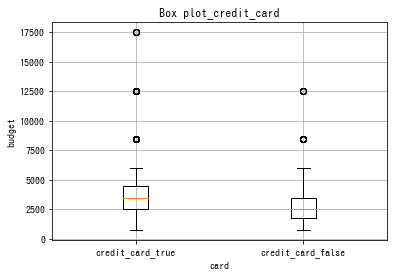

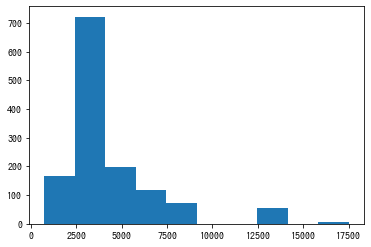

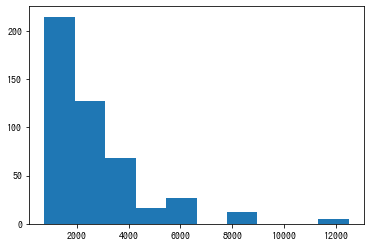

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'TakaoGothic'

credit_card_true=data[data['card'] == 1]
credit_card_false=data[data['card'] == 0]
#print(creidt_card_true)
print(credit_card_true.describe())
print(credit_card_false.describe())

points=(credit_card_true['budget.code'],credit_card_false['budget.code'])
fig, ax = plt.subplots()

bp = ax.boxplot(points)
ax.set_xticklabels(['credit_card_true','credit_card_false'])

plt.title('Box plot_credit_card')
plt.xlabel('card')
plt.ylabel('budget')

plt.grid()


plt.show()

plt.hist(credit_card_true['budget.code'])
plt.show()

plt.hist(credit_card_false['budget.code'])
plt.show()

In [28]:
credit_card_true['credit_card']=credit_card_true['credit_card'].str.strip()
credit_card_true['credit_card']=credit_card_true['credit_card'].str.replace("{'code': 'c02', 'name': 'マスター'}","M")
credit_card_true['credit_card']=credit_card_true['credit_card'].str.replace('[','')
credit_card_true['credit_card']=credit_card_true['credit_card'].str.replace(']','')
print(credit_card_true['credit_card'].unique())
print(type(credit_card_true['credit_card'][0]))

Visa=credit_card_true[credit_card_true['credit_card'].str.contains('V')]
Master=credit_card_true[credit_card_true['credit_card'].str.contains('M')]
Amex=credit_card_true[credit_card_true['credit_card'].str.contains('A')]
Dinars=credit_card_true[credit_card_true['credit_card'].str.contains('D')]
JCB=credit_card_true[credit_card_true['credit_card'].str.contains('J')]
Discover=credit_card_true[credit_card_true['credit_card'].str.contains('Dis')]
Ginren=credit_card_true[credit_card_true['credit_card'].str.contains('G')]

['V,M,A,D,J' 'V,M,A,D,J,Dis' 'V,M' 'V,M,A,D,J,G' 'V,M,J' 'V,M,A,J' 'V,M,A'
 'V,M,A,D,J,G,Dis' 'V,M,J,G' 'V,D,J' 'V,M,G' 'V,M,D,J' 'V' 'V,A,D,J'
 'V,M,A,J,Dis' 'V,M,A,J,G' 'V,M,A,D' 'V,J' 'V,M,D' 'V,M,D,J,G' 'A,D,J'
 'V,D,J,G' 'V,M,A,D,G,Dis' 'M,A,J' 'V,A,D,J,G' 'V,A,J' 'A,J' 'V,M,A,D,Dis'
 'A,J,G' 'V,M,J,Dis' 'M,A,D,J' 'V,D,J,Dis']
<class 'str'>


<ipython-input-28-fd20e2de7026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_true['credit_card']=credit_card_true['credit_card'].str.strip()
<ipython-input-28-fd20e2de7026>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_true['credit_card']=credit_card_true['credit_card'].str.replace("{'code': 'c02', 'name': 'マスター'}","M")
<ipython-input-28-fd20e2de7026>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

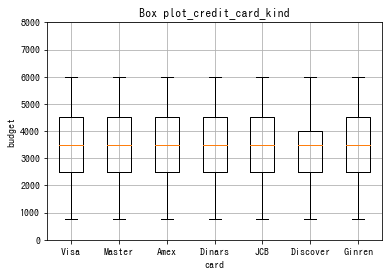

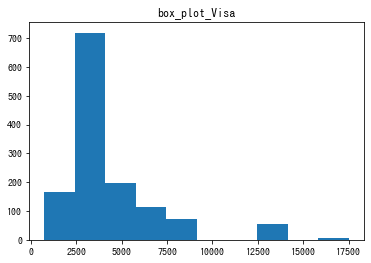

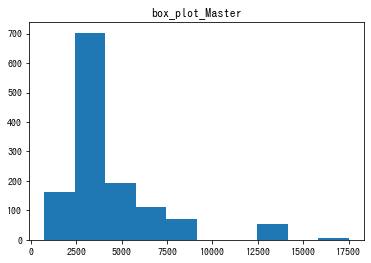

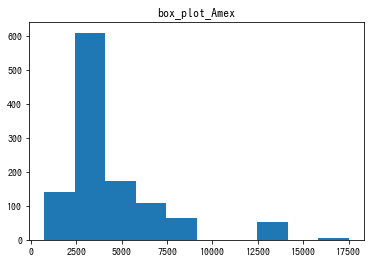

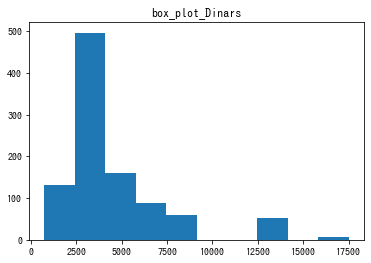

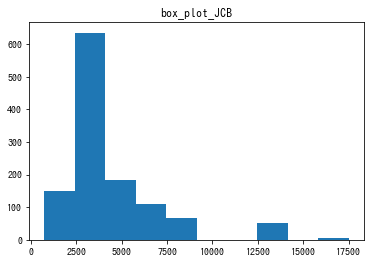

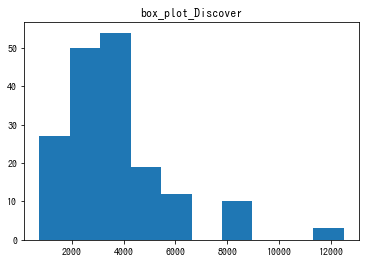

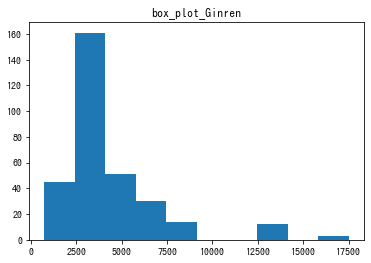

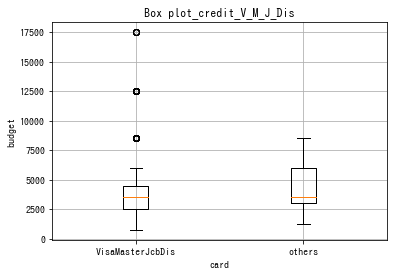

In [29]:
points_1=(Visa['budget.code'],Master['budget.code'],Amex['budget.code'],Dinars['budget.code'],JCB['budget.code'],
         Discover['budget.code'],Ginren['budget.code'])
fig, ax = plt.subplots()

bp = ax.boxplot(points_1)
ax.set_xticklabels(['Visa','Master','Amex','Dinars','JCB','Discover','Ginren'])

plt.title('Box plot_credit_card_kind')
plt.xlabel('card')
plt.ylabel('budget')
plt.ylim([0,8000])
plt.grid()

plt.show()

credit_genre=[Visa,Master,Amex,Dinars,JCB,Discover,Ginren]
credit_genre_name=['Visa','Master','Amex','Dinars','JCB','Discover','Ginren']

for i,r in zip(credit_genre,credit_genre_name):
    plt.title('box_plot_'+r)
    plt.hist(i['budget.code'])
    plt.show()

credit_card_VorMorJ=credit_card_true[credit_card_true['credit_card'].str.contains('V'or'M'or'J'or'Dis')]
credit_card_others =credit_card_true[~credit_card_true['credit_card'].str.contains('V'or'M'or'J'or'Dis')]

points_2=(credit_card_VorMorJ['budget.code'],credit_card_others['budget.code'])
fig, ax = plt.subplots()

bp = ax.boxplot(points_2)
ax.set_xticklabels(['VisaMasterJcbDis','others'])

plt.title('Box plot_credit_V_M_J_Dis')
plt.xlabel('card')
plt.ylabel('budget')
#plt.ylim([0,8000])
plt.grid()


In [30]:
data.columns

Index(['band', 'barrier_free', 'capacity', 'card', 'charter', 'child',
       'course', 'credit_card', 'english', 'free_drink', 'free_food',
       'horigotatsu', 'karaoke', 'ktai_coupon', 'lat', 'lng', 'lunch',
       'midnight', 'non_smoking', 'parking', 'party_capacity', 'pet',
       'private_room', 'show', 'tatami', 'tv', 'wifi', 'budget.code',
       'genre.code', 'large_area.code', 'large_service_area.code',
       'middle_area.code', 'service_area.code', 'small_area.code',
       'distance_kyoto', 'distance_kawaramachi', 'distance_sanjo'],
      dtype='object')

In [31]:
data_food_genre=data[['lat','lng','budget.code','genre.code']]
print(data_food_genre['genre.code'].unique())
print(type(data_food_genre['genre.code'].unique()))
unique=data_food_genre['genre.code'].unique()
food_genre_name=unique.tolist()
print(food_genre_name)
print(type(food_genre_name))

['焼肉・ホルモン' '韓国料理' 'ダイニングバー・バル' '居酒屋' 'イタリアン・フレンチ' 'カフェ・スイーツ' '和食'
 'お好み焼き・もんじゃ' 'アジア・エスニック' '各国料理' '洋食' '創作料理' '中華' 'カラオケ・パーティー' 'ラーメン'
 'バー・カクテル' 'その他']
<class 'numpy.ndarray'>
['焼肉・ホルモン', '韓国料理', 'ダイニングバー・バル', '居酒屋', 'イタリアン・フレンチ', 'カフェ・スイーツ', '和食', 'お好み焼き・もんじゃ', 'アジア・エスニック', '各国料理', '洋食', '創作料理', '中華', 'カラオケ・パーティー', 'ラーメン', 'バー・カクテル', 'その他']
<class 'list'>


In [32]:
data_food_genre

,lat,lng,budget.code,genre.code
0,35.006549,135.769364,2500.0,焼肉・ホルモン
1,35.007399,135.770116,2500.0,韓国料理
2,34.999029,135.766285,2500.0,韓国料理
3,35.006616,135.766971,1750.0,ダイニングバー・バル
4,35.004726,135.769912,2500.0,居酒屋
...,...,...,...,...
2946,35.016863,135.768701,6000.0,ダイニングバー・バル
2947,35.011790,135.770719,6000.0,和食
2948,35.013025,135.768716,3500.0,ダイニングバー・バル
2951,35.013098,135.771057,12500.0,和食


In [33]:
print(data_food_genre)

            lat         lng  budget.code  genre.code
0     35.006549  135.769364       2500.0     焼肉・ホルモン
1     35.007399  135.770116       2500.0        韓国料理
2     34.999029  135.766285       2500.0        韓国料理
3     35.006616  135.766971       1750.0  ダイニングバー・バル
4     35.004726  135.769912       2500.0         居酒屋
...         ...         ...          ...         ...
2946  35.016863  135.768701       6000.0  ダイニングバー・バル
2947  35.011790  135.770719       6000.0          和食
2948  35.013025  135.768716       3500.0  ダイニングバー・バル
2951  35.013098  135.771057      12500.0          和食
2952  35.007477  135.764805       1750.0         居酒屋

[1808 rows x 4 columns]


In [34]:
#food_genre_name=(data_food_genre['genre.code'].unique()).tolist
colors=['red', 'blue', 'green', 'purple', 'orange', 'darkred',
             'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
             'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
             'gray']

map_food_genre=folium.Map(location=address_kyoto.latlng,zoom_start=15)



 
for f,c, in zip(food_genre_name,colors):
    print(f,c)
    data_food_genre=data[['lat','lng','budget.code','genre.code']]
    data_food_genre=data_food_genre[data_food_genre['genre.code'] == f]
    places=pd.concat([data_food_genre.lat,data_food_genre.lng],axis=1)
   
    for i, r in zip(data_food_genre.lat,data_food_genre.lng):
        folium.Marker(
            location=[i,r],
            icon=folium.Icon(color=c),
            popup=f,
        ).add_to(map_food_genre)    
    
map_food_genre.save('map_food_genre.html')



焼肉・ホルモン red
韓国料理 blue
ダイニングバー・バル green
居酒屋 purple
イタリアン・フレンチ orange
カフェ・スイーツ darkred
和食 lightred
お好み焼き・もんじゃ beige
アジア・エスニック darkblue
各国料理 darkgreen
洋食 cadetblue
創作料理 darkpurple
中華 white
カラオケ・パーティー pink
ラーメン lightblue
バー・カクテル lightgreen
その他 gray


In [35]:
print(type(colors))
print(type(food_genre_name))
print(len(colors),len(food_genre_name))

<class 'list'>
<class 'list'>
17 17


In [36]:
print(data_food_genre[0:5])
places=pd.concat([data_food_genre.lat,data_food_genre.lng],axis=1)
print(places)

           lat         lng  budget.code genre.code
358  35.007473  135.766032        750.0        その他
           lat         lng
358  35.007473  135.766032


In [37]:
food_genre_name=['焼肉・ホルモン', '韓国料理' ,'ダイニングバー・バル', '居酒屋' ,'イタリアン・フレンチ', 'カフェ・スイーツ', '和食',
 'お好み焼き・もんじゃ', 'アジア・エスニック', '各国料理' ,'洋食', '創作料理', '中華', 'カラオケ・パーティー', 'ラーメン',
 'バー・カクテル', 'その他']
print(len(food_genre_name))
print(len(colors))
print(type(food_genre_name[0]))

17
17
<class 'str'>


In [38]:
data.columns

Index(['band', 'barrier_free', 'capacity', 'card', 'charter', 'child',
       'course', 'credit_card', 'english', 'free_drink', 'free_food',
       'horigotatsu', 'karaoke', 'ktai_coupon', 'lat', 'lng', 'lunch',
       'midnight', 'non_smoking', 'parking', 'party_capacity', 'pet',
       'private_room', 'show', 'tatami', 'tv', 'wifi', 'budget.code',
       'genre.code', 'large_area.code', 'large_service_area.code',
       'middle_area.code', 'service_area.code', 'small_area.code',
       'distance_kyoto', 'distance_kawaramachi', 'distance_sanjo'],
      dtype='object')

3333333333333333333333333 band                  int64
barrier_free          int64
card                  int64
charter               int64
child                 int64
course                int64
english               int64
free_drink            int64
free_food             int64
horigotatsu           int64
karaoke               int64
ktai_coupon           int64
lunch                 int64
midnight              int64
non_smoking          object
parking               int64
pet                   int64
private_room          int64
show                  int64
tatami                int64
tv                    int64
wifi                 object
budget.code         float64
genre.code           object
middle_area.code     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
   band_0  band_1  barrier_free_0  barrier_free_1  card_0  card_1  charter_0  \
0       1       0               1               0       0       1          0   
1       1       0               1               0       1     

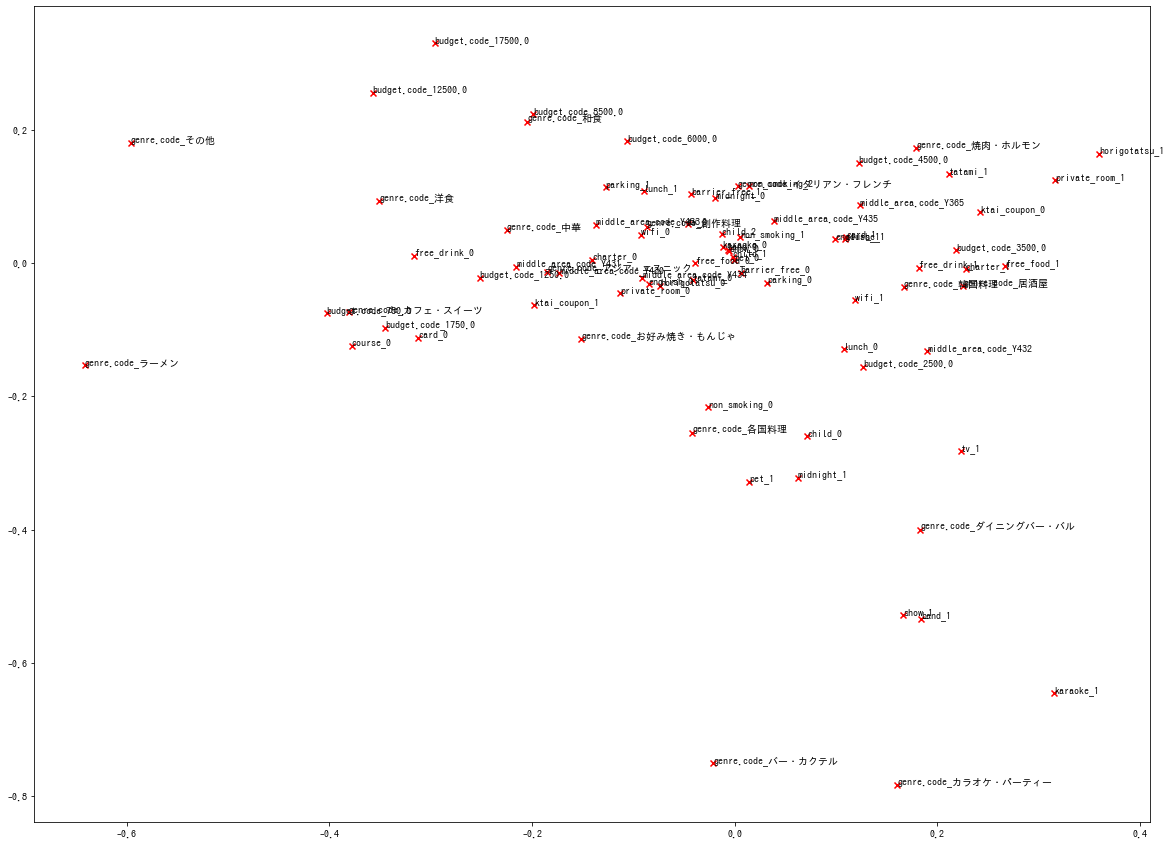

In [39]:
%matplotlib inline

import mca
data_corres=data[['band', 'barrier_free', 'card', 'charter', 'child',
       'course','english', 'free_drink', 'free_food',
       'horigotatsu', 'karaoke', 'ktai_coupon',  'lunch',
       'midnight', 'non_smoking', 'parking', 'pet',
       'private_room', 'show', 'tatami', 'tv', 'wifi', 'budget.code',
       'genre.code',
       'middle_area.code']]

data_corres=data[['band', 'barrier_free', 'card', 'charter', 'child',
       'course','english', 'free_drink', 'free_food',
       'horigotatsu', 'karaoke', 'ktai_coupon',  'lunch',
       'midnight', 'non_smoking', 'parking', 'pet',
       'private_room', 'show', 'tatami', 'tv', 'wifi', 'budget.code',
       'genre.code',
       'middle_area.code']]

data_corres = data_corres[data_corres['wifi'] != '未確認']
data_corres = data_corres[data_corres['non_smoking'] != '未確認']
print('3333333333333333333333333',data_corres.dtypes)
data_corres.astype(object)
data_corres=pd.get_dummies(data_corres.astype(object))
#data_corres.to_string(index=False)
print(type(data_corres))

#data_corres.to_csv('data_corres.csv',index=False,encoding='cp932')

#data_corres=pd.read_table('/home/matsuo/semi_3_1/data_corres.csv',encoding='cp932')

#data_corres.to_csv('restaurant_kyoto_cross.csv',index=False,encoding='utf_8_sig')
#cross=pd.read_csv('/home/matsuo/semi_3_1/restaurant_kyoto_cross.csv',encoding='UTF-8')
#cross = pd.get_dummies(cross)

#cross = pd.read_('cross.csv', sep=',', skiprows=1, index_col=0, header=0)
print(data_corres[0:5])
import matplotlib.pyplot as plot
plot.rcParams['font.family'] = 'TakaoGothic'

mca_counts = mca.MCA(data_corres)
rows = mca_counts.fs_r(N=2)
cols = mca_counts.fs_c(N=2)

x = rows[:,0]
y = rows[:,1]

plot.figure(figsize=(20,15))

'''plot.scatter(rows[:,0], rows[:,1], c='b',marker='o')
labels = data_corres.index
for label,x,y in zip(labels,rows[:,0],rows[:,1]):
    plot.annotate(label,xy = (x, y))'''

plot.scatter(cols[:,0], cols[:,1], c='r',marker='x')
labels = data_corres.columns
for label,x,y in zip(labels,cols[:,0],cols[:,1]):
    plot.annotate(label,xy = (x, y))
#plot.xlim(-0.0000001-0.0000035)
#plot.ylim(-0.0000002,0.0000002)
    
plot.show()

<ipython-input-40-be2c30d001a4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corres_2['middle_area.code']=data_corres_2['middle_area.code'].str.replace('Y432','河原町・木屋町')
<ipython-input-40-be2c30d001a4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corres_2['middle_area.code']=data_corres_2['middle_area.code'].str.replace('Y365','烏丸御池・四条烏丸')
<ipython-input-40-be2c30d001a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

   budget.code  genre.code middle_area.code
0       2500.0     焼肉・ホルモン          河原町・木屋町
1       2500.0        韓国料理          河原町・木屋町
2       2500.0        韓国料理          河原町・木屋町
3       1750.0  ダイニングバー・バル          河原町・木屋町
4       2500.0         居酒屋          河原町・木屋町


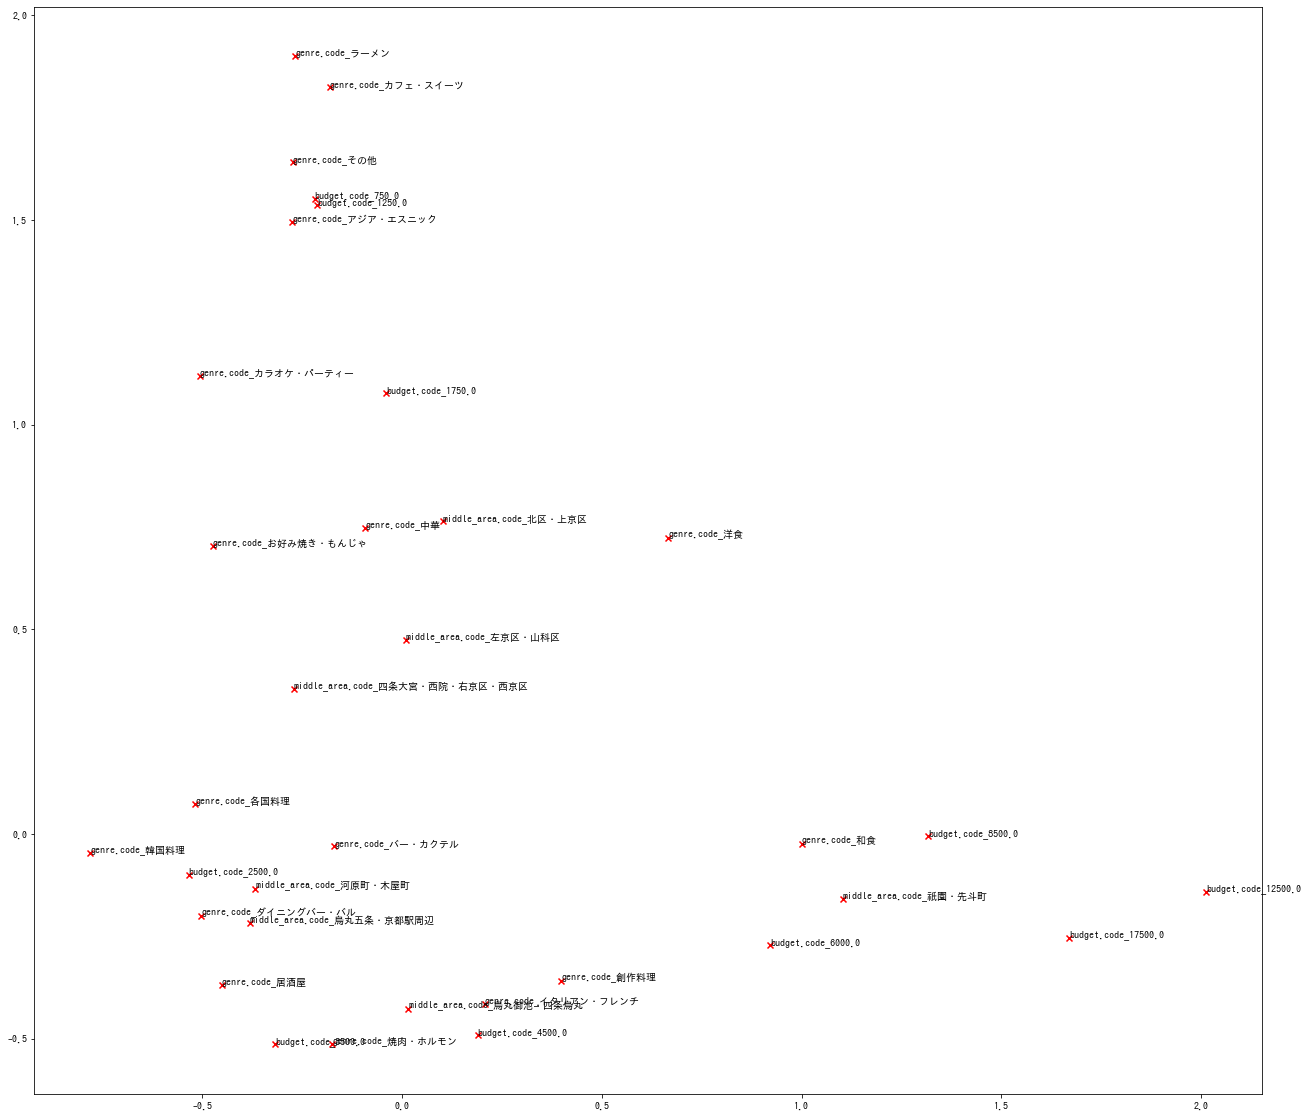

In [40]:
%matplotlib inline
data_corres_2=data[['budget.code',
       'genre.code',
       'middle_area.code']]
Yxxx={'Y432':'河原町・木屋町',
      'Y365':'烏丸御池・四条烏丸',
      'Y433':'祇園・先斗町',
      'Y431':'北区・上京区',
      'Y435':'烏丸五条・京都駅周辺',
      'Y434':'四条大宮・西院・右京区・西京区',
      'Y430':'左京区・山科区',
     }


data_corres_2['middle_area.code']=data_corres_2['middle_area.code'].str.replace('Y432','河原町・木屋町')
data_corres_2['middle_area.code']=data_corres_2['middle_area.code'].str.replace('Y365','烏丸御池・四条烏丸')
data_corres_2['middle_area.code']=data_corres_2['middle_area.code'].str.replace('Y433','祇園・先斗町')
data_corres_2['middle_area.code']=data_corres_2['middle_area.code'].str.replace('Y435','烏丸五条・京都駅周辺')
data_corres_2['middle_area.code']=data_corres_2['middle_area.code'].str.replace('Y431','北区・上京区')
data_corres_2['middle_area.code']=data_corres_2['middle_area.code'].str.replace('Y434','四条大宮・西院・右京区・西京区')
data_corres_2['middle_area.code']=data_corres_2['middle_area.code'].str.replace('Y430','左京区・山科区')
#'Y432' 'Y365' 'Y433' 'Y431' 'Y435' 'Y434' 'Y430'

print(data_corres_2[0:5])
data_corres_2.astype(object)
data_corres_2=pd.get_dummies(data_corres_2.astype(object))

mca_counts = mca.MCA(data_corres_2)
rows = mca_counts.fs_r(N=2)
cols = mca_counts.fs_c(N=2)

x = rows[:,0]
y = rows[:,1]

plot.figure(figsize=(22,20))
plot.rcParams['font.family'] = 'TakaoGothic'

plot.scatter(cols[:,0], cols[:,1], c='r',marker='x')
labels = data_corres_2.columns
for label,x,y in zip(labels,cols[:,0],cols[:,1]):
    plot.annotate(label,xy = (x, y))
    
plot.show()

In [41]:
Yxxx={'Y432':'河原町・木屋町',
      'Y365':'烏丸御池・四条烏丸',
      'Y433':'祇園・先斗町',
      'Y431':'北区・上京区',
      'Y435':'烏丸五条・京都駅周辺',
      'Y434':'四条大宮・西院・右京区・西京区',
      'Y430':'左京区・山科区',
     }
for i,r in Yxxx.items():
    print(i,r)
    data=data
    region=data[data['middle_area.code']==i]
    region_genre=region['genre.code']
    

Y432 河原町・木屋町
Y365 烏丸御池・四条烏丸
Y433 祇園・先斗町
Y431 北区・上京区
Y435 烏丸五条・京都駅周辺
Y434 四条大宮・西院・右京区・西京区
Y430 左京区・山科区


In [42]:
data_ass=data[['band', 'barrier_free',  'card', 'charter', 'child',
       'course', 'english', 'free_drink', 'free_food',
       'horigotatsu', 'karaoke', 'ktai_coupon',  'lunch',
       'midnight', 'non_smoking', 'parking',  'pet',
       'private_room', 'show', 'tatami', 'tv', 'wifi', 'budget.code',
       'genre.code',
       'middle_area.code',
       ]]

'''for i,r in zip(range(1,17+1),food_genre_name):
    print(i,r)
    data_ass['genre.code']=data_ass['genre.code'].str.replace(r,str(i))
data_ass['genre.code'].head(40)'''


for i,r in Yxxx.items():
    data_ass['middle_area.code']=data_ass['middle_area.code'].str.replace(i,r)
data_ass.head()   

<ipython-input-42-d089604a8cf7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ass['middle_area.code']=data_ass['middle_area.code'].str.replace(i,r)


,band,barrier_free,card,charter,child,course,english,free_drink,free_food,horigotatsu,...,parking,pet,private_room,show,tatami,tv,wifi,budget.code,genre.code,middle_area.code
0,0,0,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,2500.0,焼肉・ホルモン,河原町・木屋町
1,0,0,0,1,1,1,0,1,1,1,...,0,0,1,0,1,0,0,2500.0,韓国料理,河原町・木屋町
2,0,0,1,0,2,1,0,0,0,0,...,0,0,0,0,1,1,1,2500.0,韓国料理,河原町・木屋町
3,1,0,0,1,0,1,1,1,1,0,...,0,0,0,0,0,1,0,1750.0,ダイニングバー・バル,河原町・木屋町
4,0,0,1,0,2,1,1,1,1,1,...,1,0,1,0,1,0,0,2500.0,居酒屋,河原町・木屋町


['焼肉・ホルモン' '韓国料理' 'ダイニングバー・バル' '居酒屋' 'イタリアン・フレンチ' 'カフェ・スイーツ' '和食'
 'お好み焼き・もんじゃ' 'アジア・エスニック' '各国料理' '洋食' '創作料理' '中華' 'カラオケ・パーティー' 'ラーメン'
 'バー・カクテル' 'その他']
17
Counter({'居酒屋': 539, '和食': 364, 'イタリアン・フレンチ': 172, 'ダイニングバー・バル': 136, '焼肉・ホルモン': 131, 'お好み焼き・もんじゃ': 71, 'カフェ・スイーツ': 67, '中華': 67, '洋食': 59, '韓国料理': 43, '創作料理': 39, 'ラーメン': 37, 'バー・カクテル': 32, 'アジア・エスニック': 25, 'カラオケ・パーティー': 14, '各国料理': 11, 'その他': 1})
焼肉・ホルモン 131
韓国料理 43
ダイニングバー・バル 136
居酒屋 539
イタリアン・フレンチ 172
カフェ・スイーツ 67
和食 364
お好み焼き・もんじゃ 71
アジア・エスニック 25
各国料理 11
洋食 59
創作料理 39
中華 67
カラオケ・パーティー 14
ラーメン 37
バー・カクテル 32
その他 1
17 17 17


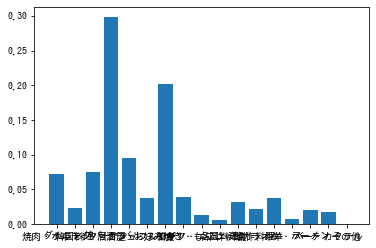

1 Y432 河原町・木屋町
0       焼肉・ホルモン
1          韓国料理
2          韓国料理
3    ダイニングバー・バル
4           居酒屋
Name: genre.code, dtype: object
Counter({'居酒屋': 112, 'ダイニングバー・バル': 63, '和食': 53, 'イタリアン・フレンチ': 35, '焼肉・ホルモン': 31, '韓国料理': 14, 'バー・カクテル': 14, 'カフェ・スイーツ': 13, 'お好み焼き・もんじゃ': 11, '中華': 10, 'アジア・エスニック': 5, '洋食': 5, 'カラオケ・パーティー': 5, 'ラーメン': 5, '各国料理': 4, '創作料理': 4})
['焼肉・ホルモン' '韓国料理' 'ダイニングバー・バル' '居酒屋' 'イタリアン・フレンチ' 'カフェ・スイーツ' '和食'
 'お好み焼き・もんじゃ' 'アジア・エスニック' '各国料理' '洋食' '創作料理' '中華' 'カラオケ・パーティー' 'ラーメン'
 'バー・カクテル']
16
焼肉・ホルモン 31
韓国料理 14
ダイニングバー・バル 63
居酒屋 112
イタリアン・フレンチ 35
カフェ・スイーツ 13
和食 53
お好み焼き・もんじゃ 11
アジア・エスニック 5
各国料理 4
洋食 5
創作料理 4
中華 10
カラオケ・パーティー 5
ラーメン 5
バー・カクテル 14
16 16 16


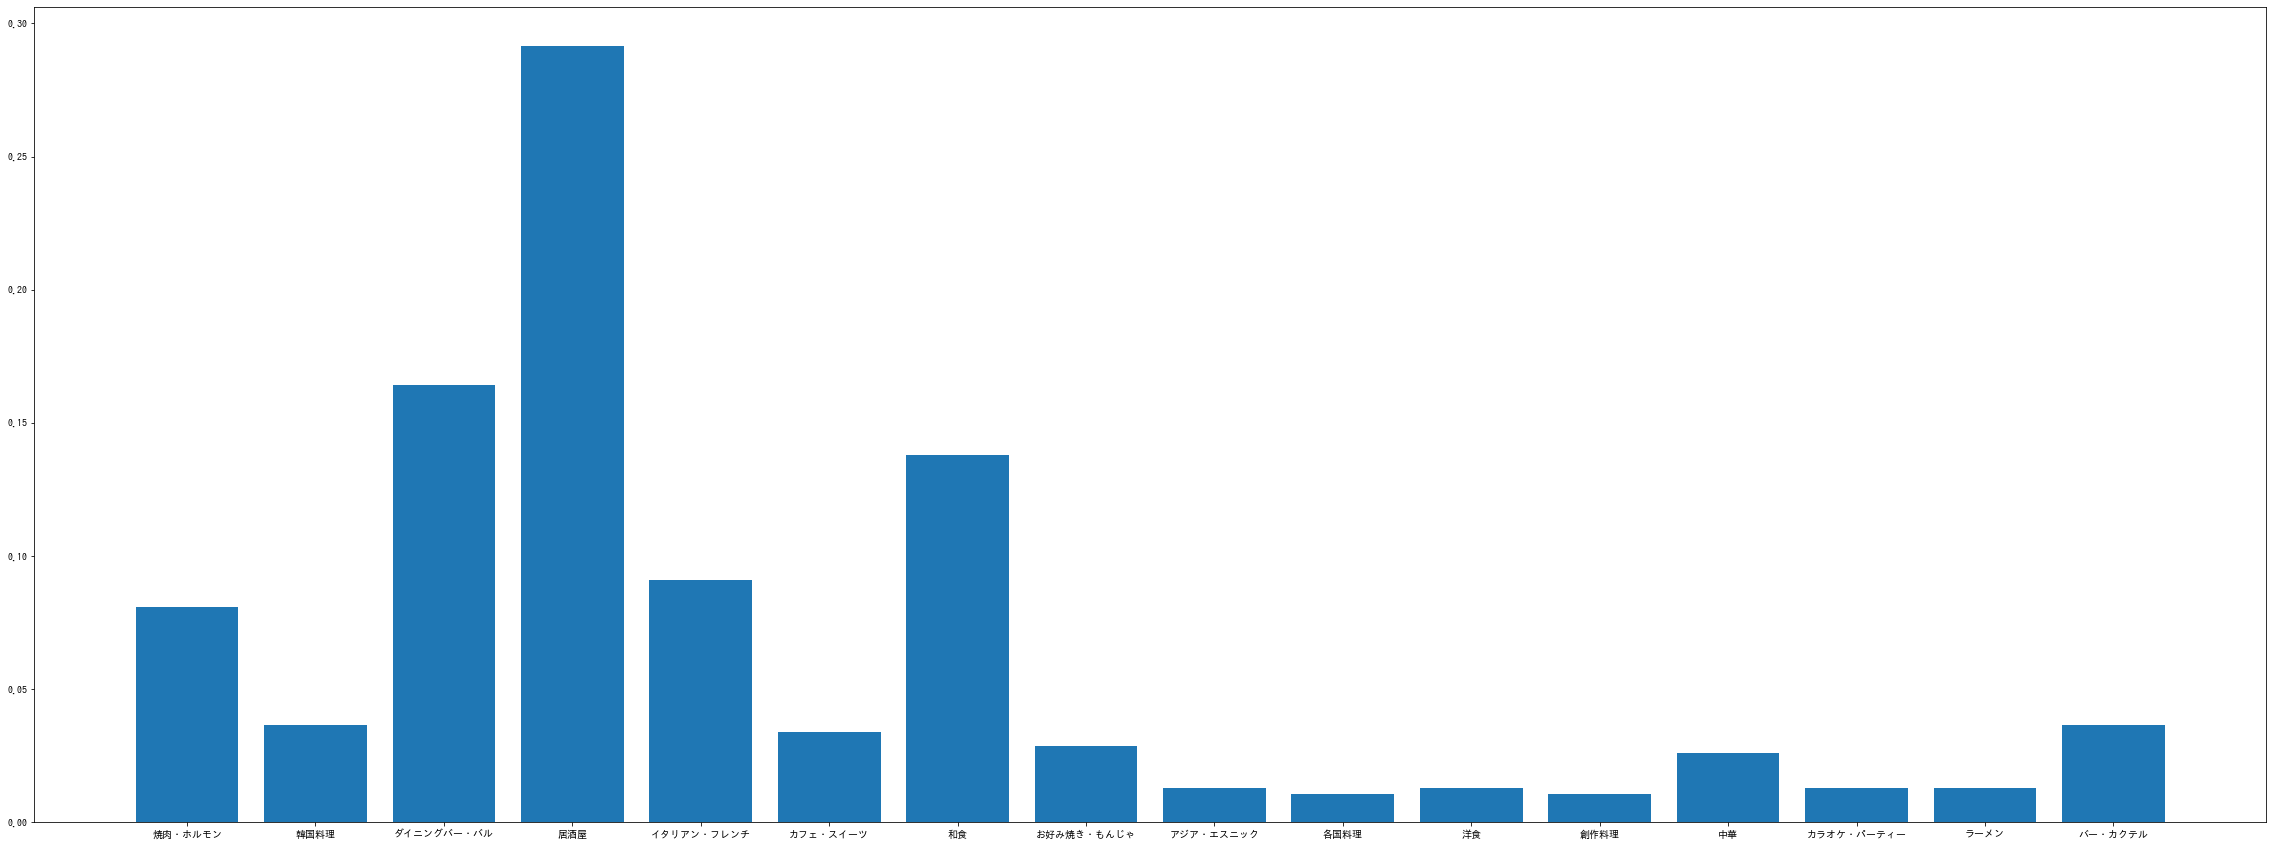

2 Y365 烏丸御池・四条烏丸
176    イタリアン・フレンチ
177       焼肉・ホルモン
178           居酒屋
179           居酒屋
180           居酒屋
Name: genre.code, dtype: object
Counter({'居酒屋': 121, '和食': 61, 'イタリアン・フレンチ': 49, '焼肉・ホルモン': 19, 'ダイニングバー・バル': 18, 'カフェ・スイーツ': 9, '中華': 6, '洋食': 6, 'アジア・エスニック': 4, 'バー・カクテル': 4, 'ラーメン': 4, '韓国料理': 3, 'お好み焼き・もんじゃ': 3, '創作料理': 3, 'その他': 1, 'カラオケ・パーティー': 1})
['イタリアン・フレンチ' '焼肉・ホルモン' '居酒屋' '和食' 'ダイニングバー・バル' '韓国料理' '中華' 'カフェ・スイーツ'
 'アジア・エスニック' '洋食' 'お好み焼き・もんじゃ' 'バー・カクテル' 'その他' '創作料理' 'ラーメン' 'カラオケ・パーティー']
16
イタリアン・フレンチ 49
焼肉・ホルモン 19
居酒屋 121
和食 61
ダイニングバー・バル 18
韓国料理 3
中華 6
カフェ・スイーツ 9
アジア・エスニック 4
洋食 6
お好み焼き・もんじゃ 3
バー・カクテル 4
その他 1
創作料理 3
ラーメン 4
カラオケ・パーティー 1
16 16 16


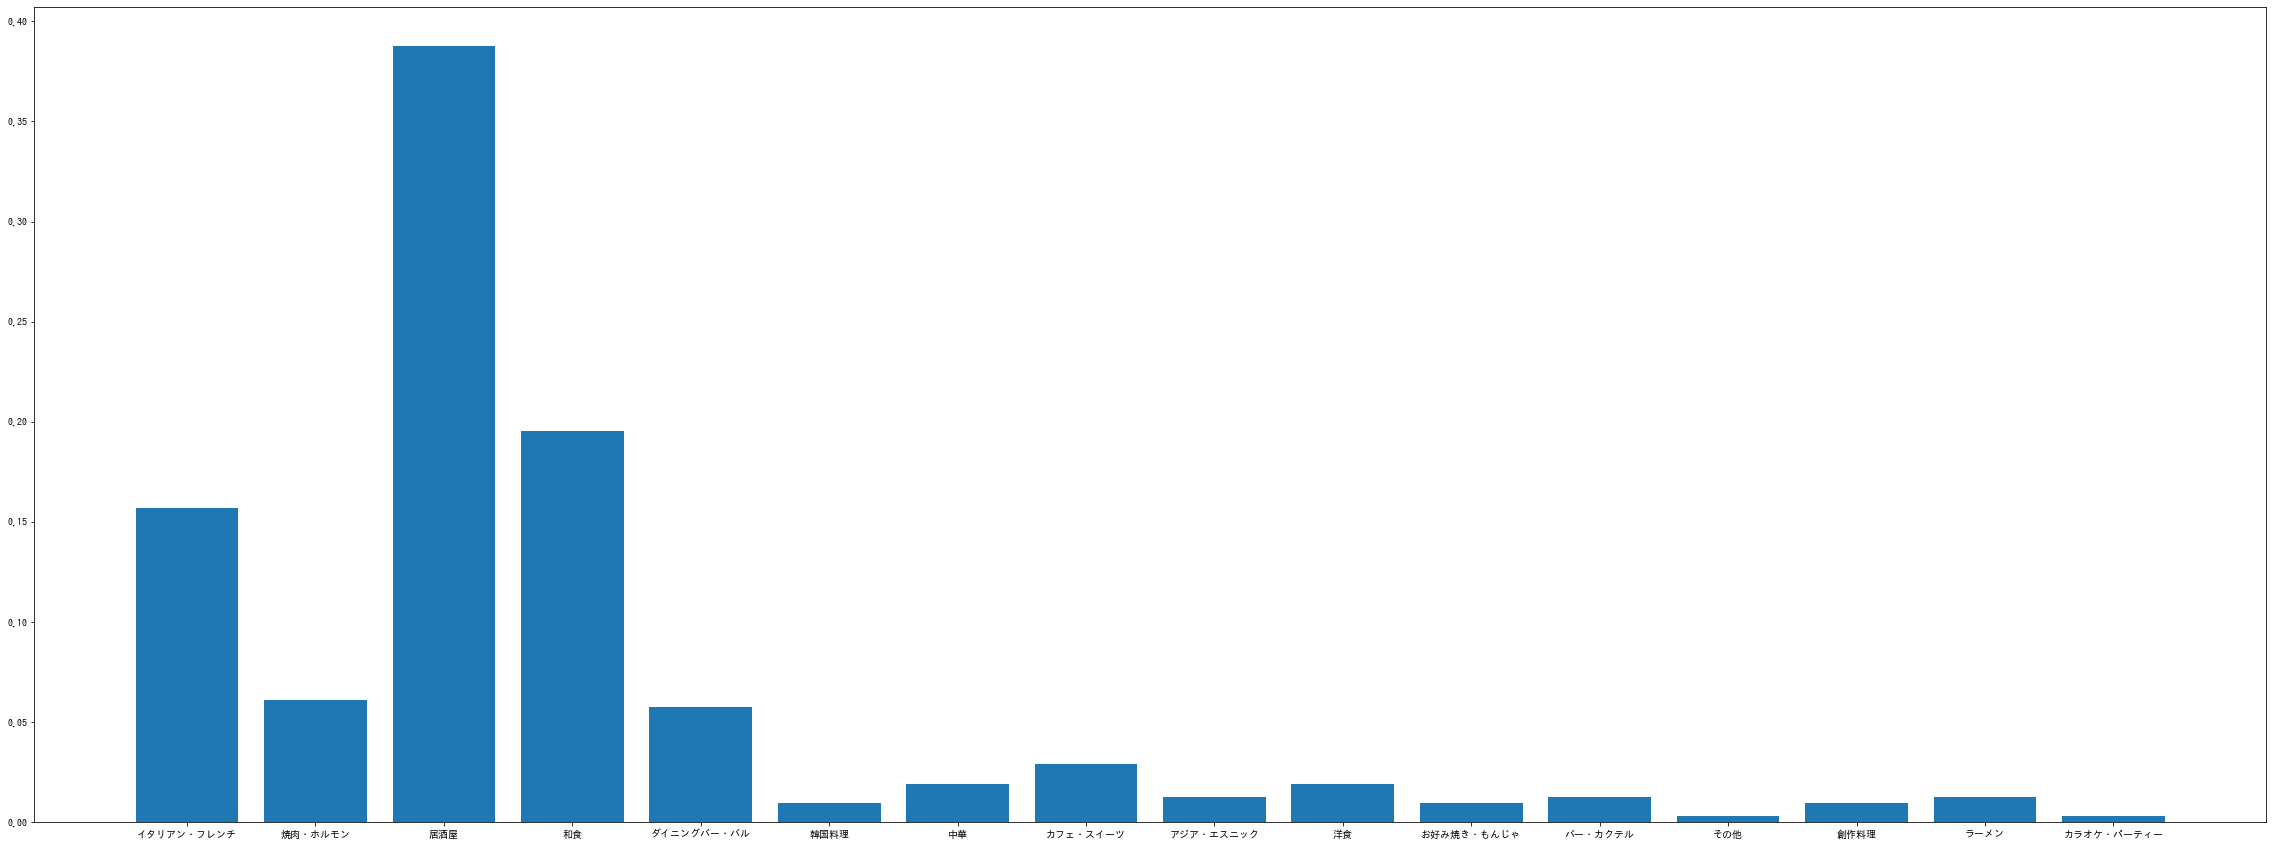

3 Y433 祇園・先斗町
429         和食
430        居酒屋
431    バー・カクテル
432        居酒屋
433         和食
Name: genre.code, dtype: object
Counter({'和食': 102, '居酒屋': 49, 'イタリアン・フレンチ': 22, 'ダイニングバー・バル': 15, '洋食': 14, '創作料理': 12, '焼肉・ホルモン': 11, 'バー・カクテル': 10, 'お好み焼き・もんじゃ': 10, '中華': 8, 'カフェ・スイーツ': 5, 'ラーメン': 2, 'カラオケ・パーティー': 1, '韓国料理': 1, 'アジア・エスニック': 1})
['和食' '居酒屋' 'バー・カクテル' '洋食' '焼肉・ホルモン' 'ダイニングバー・バル' 'イタリアン・フレンチ' '中華' '創作料理'
 'カラオケ・パーティー' 'カフェ・スイーツ' 'お好み焼き・もんじゃ' '韓国料理' 'アジア・エスニック' 'ラーメン']
15
和食 102
居酒屋 49
バー・カクテル 10
洋食 14
焼肉・ホルモン 11
ダイニングバー・バル 15
イタリアン・フレンチ 22
中華 8
創作料理 12
カラオケ・パーティー 1
カフェ・スイーツ 5
お好み焼き・もんじゃ 10
韓国料理 1
アジア・エスニック 1
ラーメン 2
15 15 15


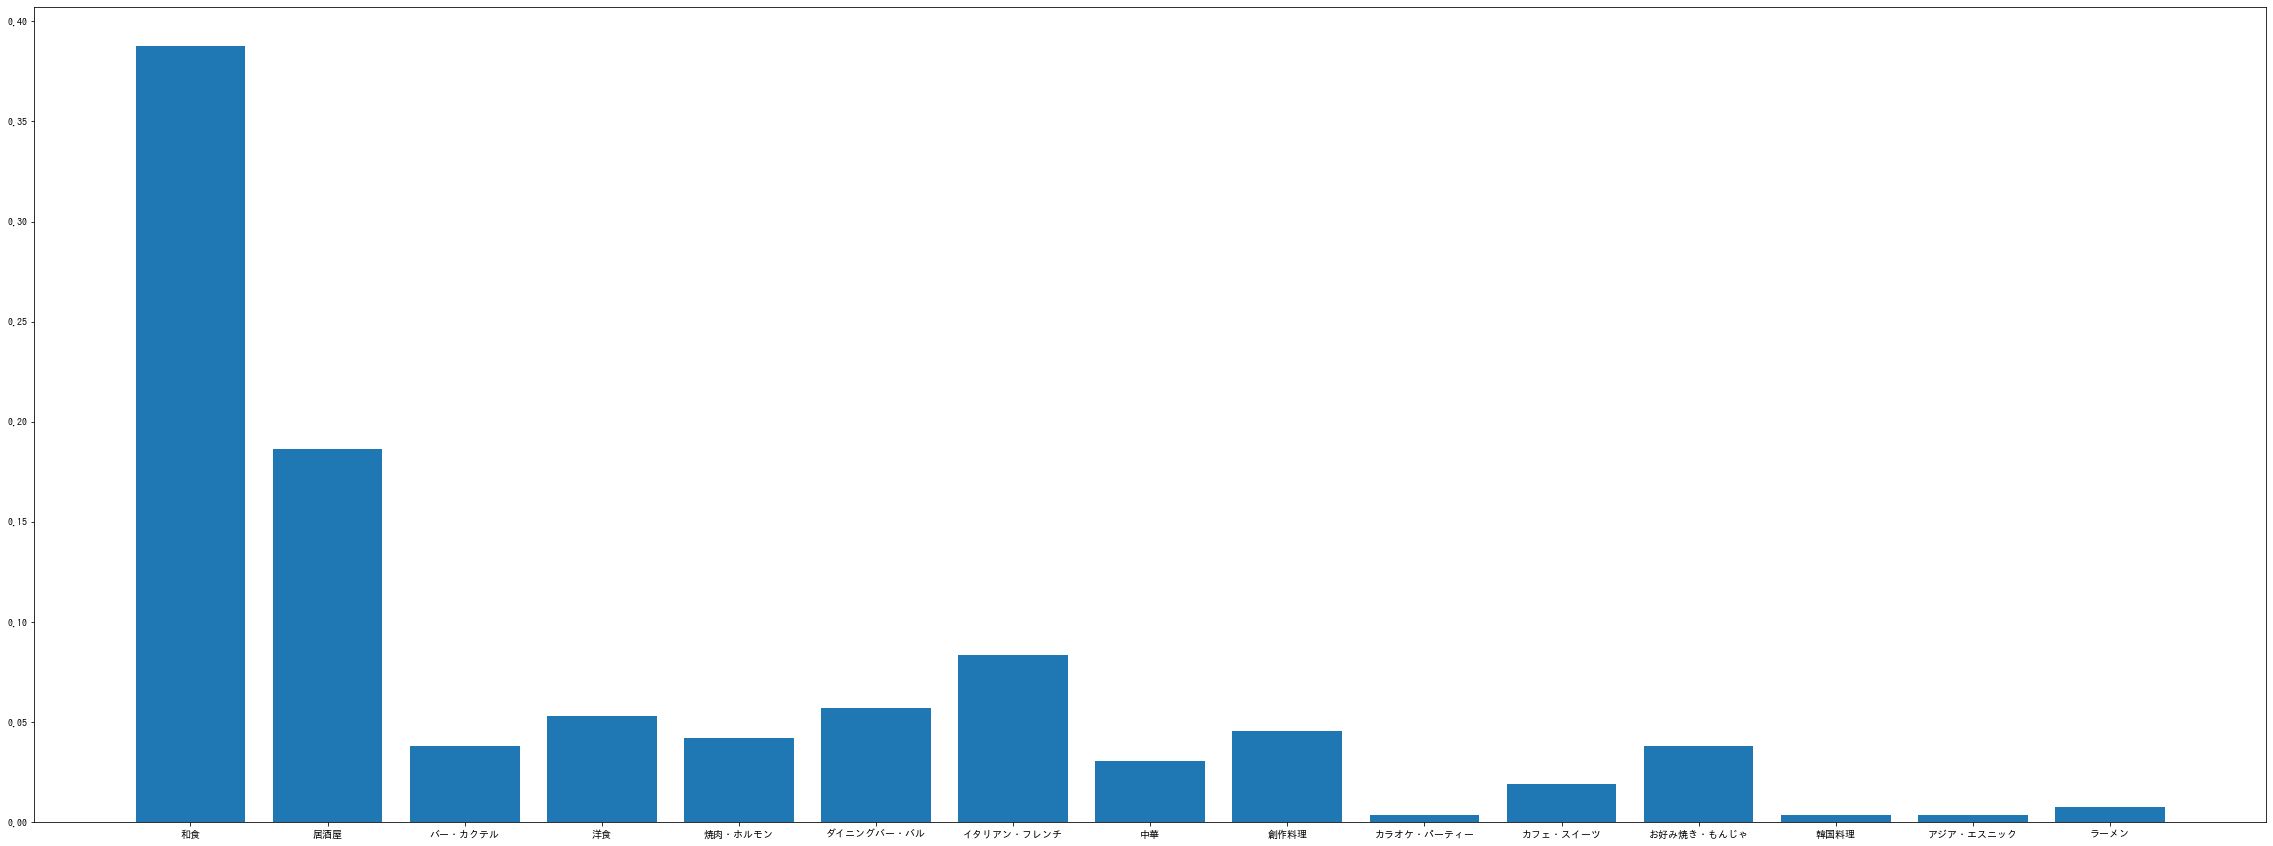

4 Y431 北区・上京区
634           居酒屋
635           居酒屋
636           居酒屋
637    イタリアン・フレンチ
638           居酒屋
Name: genre.code, dtype: object
Counter({'居酒屋': 35, '和食': 29, '中華': 13, 'カフェ・スイーツ': 12, '洋食': 11, 'イタリアン・フレンチ': 9, 'お好み焼き・もんじゃ': 6, '焼肉・ホルモン': 6, 'ラーメン': 5, 'ダイニングバー・バル': 4, 'アジア・エスニック': 4, '韓国料理': 4, '創作料理': 2, 'カラオケ・パーティー': 1})
['居酒屋' 'イタリアン・フレンチ' '洋食' 'ダイニングバー・バル' '和食' 'アジア・エスニック' 'お好み焼き・もんじゃ'
 'カフェ・スイーツ' '創作料理' '中華' '韓国料理' 'カラオケ・パーティー' 'ラーメン' '焼肉・ホルモン']
14
居酒屋 35
イタリアン・フレンチ 9
洋食 11
ダイニングバー・バル 4
和食 29
アジア・エスニック 4
お好み焼き・もんじゃ 6
カフェ・スイーツ 12
創作料理 2
中華 13
韓国料理 4
カラオケ・パーティー 1
ラーメン 5
焼肉・ホルモン 6
14 14 14


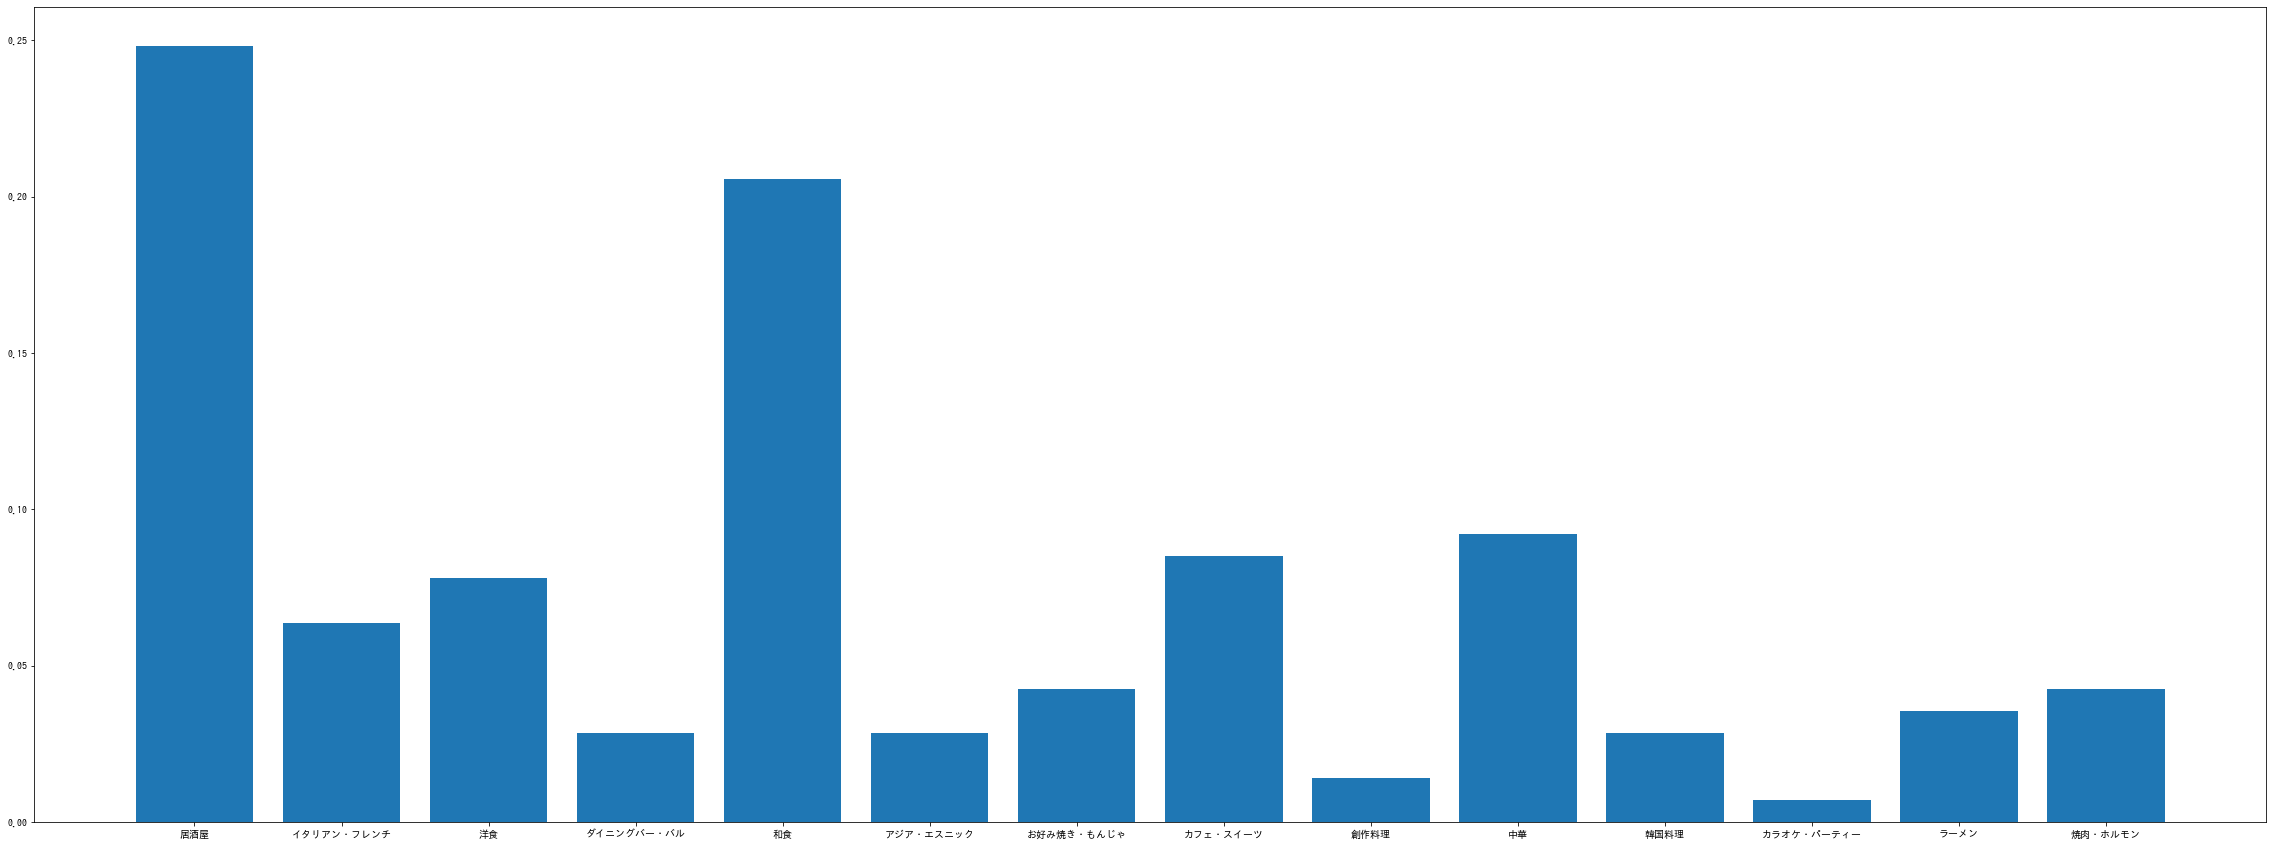

5 Y435 烏丸五条・京都駅周辺
650    ダイニングバー・バル
651    イタリアン・フレンチ
652           居酒屋
653           居酒屋
654           居酒屋
Name: genre.code, dtype: object
Counter({'居酒屋': 100, '和食': 38, 'イタリアン・フレンチ': 27, '焼肉・ホルモン': 24, 'ダイニングバー・バル': 16, 'お好み焼き・もんじゃ': 15, '韓国料理': 10, '洋食': 8, '中華': 7, '創作料理': 7, 'ラーメン': 6, 'カフェ・スイーツ': 3, 'カラオケ・パーティー': 3, 'バー・カクテル': 2, '各国料理': 2, 'アジア・エスニック': 2})
['ダイニングバー・バル' 'イタリアン・フレンチ' '居酒屋' '焼肉・ホルモン' '和食' '中華' 'お好み焼き・もんじゃ' 'ラーメン'
 '韓国料理' '洋食' 'カフェ・スイーツ' 'バー・カクテル' '各国料理' '創作料理' 'カラオケ・パーティー' 'アジア・エスニック']
16
ダイニングバー・バル 16
イタリアン・フレンチ 27
居酒屋 100
焼肉・ホルモン 24
和食 38
中華 7
お好み焼き・もんじゃ 15
ラーメン 6
韓国料理 10
洋食 8
カフェ・スイーツ 3
バー・カクテル 2
各国料理 2
創作料理 7
カラオケ・パーティー 3
アジア・エスニック 2
16 16 16


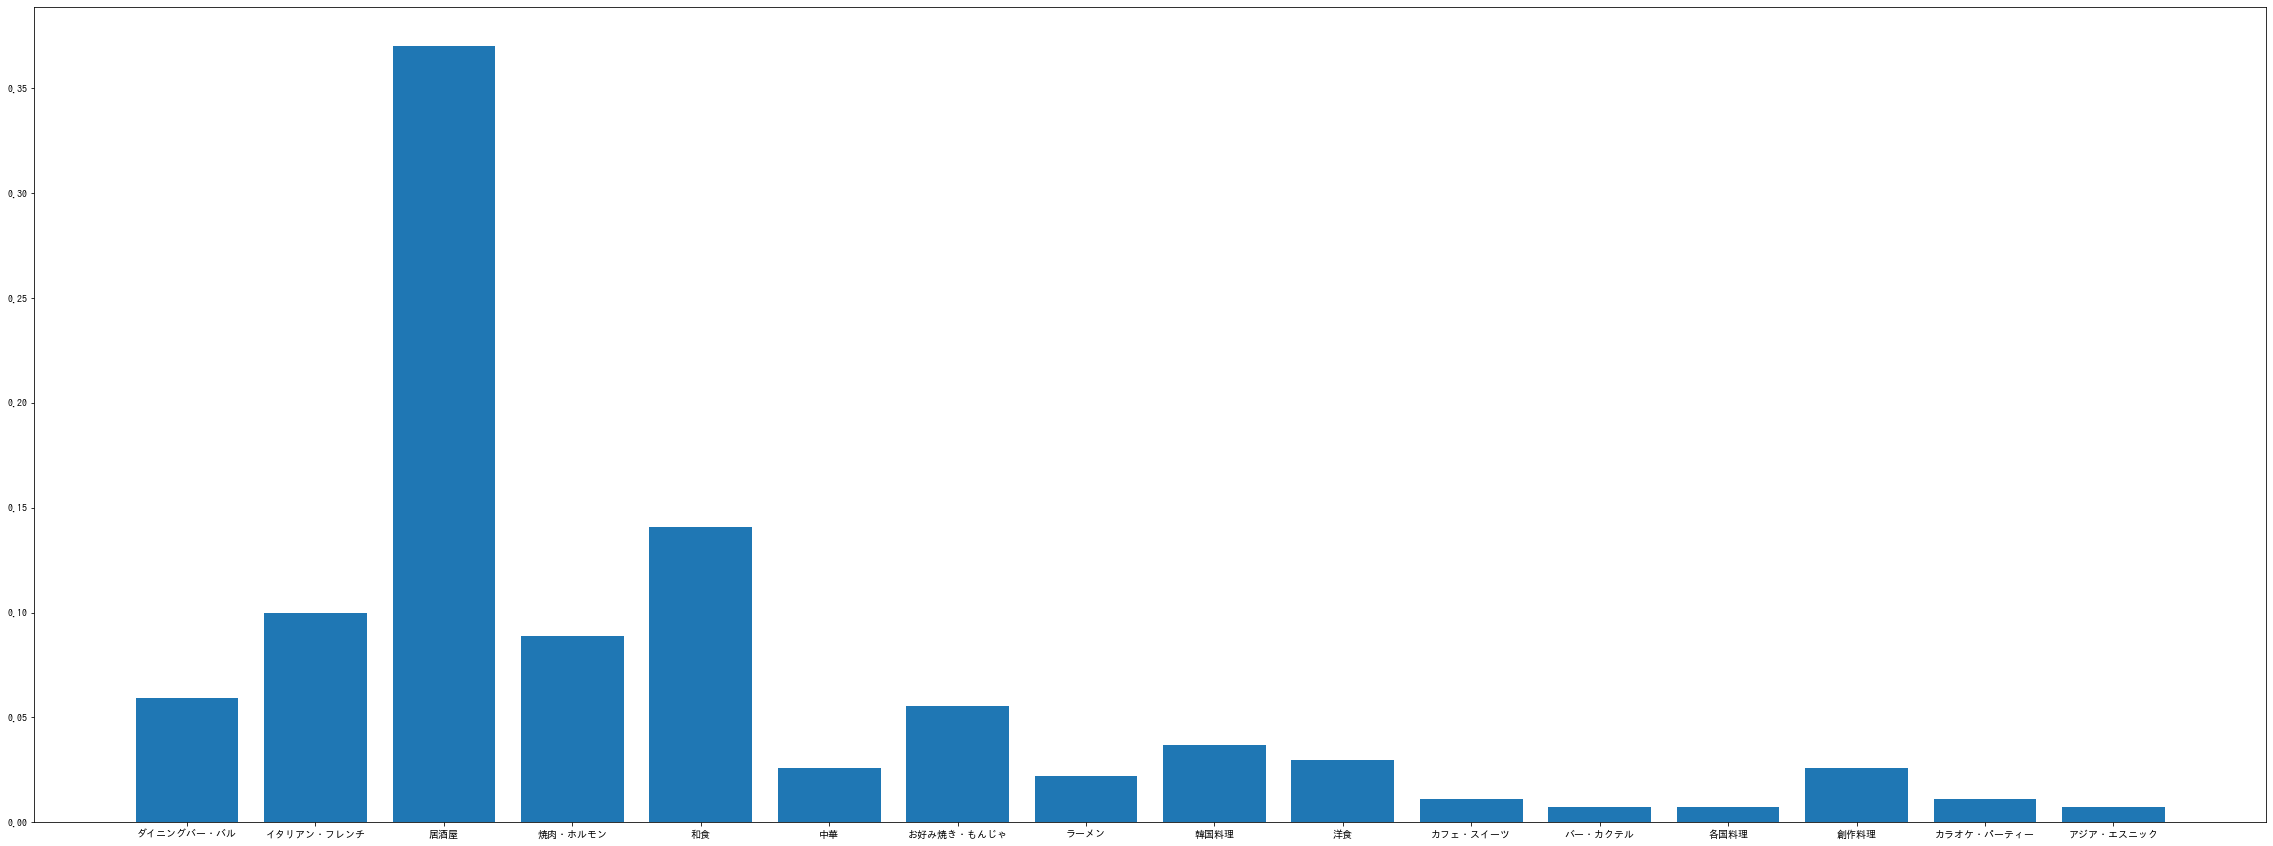

6 Y434 四条大宮・西院・右京区・西京区
885        居酒屋
886        居酒屋
887    焼肉・ホルモン
888    焼肉・ホルモン
889    焼肉・ホルモン
Name: genre.code, dtype: object
Counter({'居酒屋': 78, '和食': 41, '焼肉・ホルモン': 26, 'お好み焼き・もんじゃ': 17, 'イタリアン・フレンチ': 16, 'カフェ・スイーツ': 15, '中華': 11, '韓国料理': 10, 'ラーメン': 10, '洋食': 8, 'ダイニングバー・バル': 5, '創作料理': 5, 'カラオケ・パーティー': 3, 'バー・カクテル': 1, 'アジア・エスニック': 1, '各国料理': 1})
['居酒屋' '焼肉・ホルモン' '和食' 'お好み焼き・もんじゃ' '韓国料理' 'ダイニングバー・バル' 'バー・カクテル' '洋食'
 'イタリアン・フレンチ' 'カフェ・スイーツ' 'ラーメン' 'カラオケ・パーティー' 'アジア・エスニック' '中華' '創作料理'
 '各国料理']
16
居酒屋 78
焼肉・ホルモン 26
和食 41
お好み焼き・もんじゃ 17
韓国料理 10
ダイニングバー・バル 5
バー・カクテル 1
洋食 8
イタリアン・フレンチ 16
カフェ・スイーツ 15
ラーメン 10
カラオケ・パーティー 3
アジア・エスニック 1
中華 11
創作料理 5
各国料理 1
16 16 16


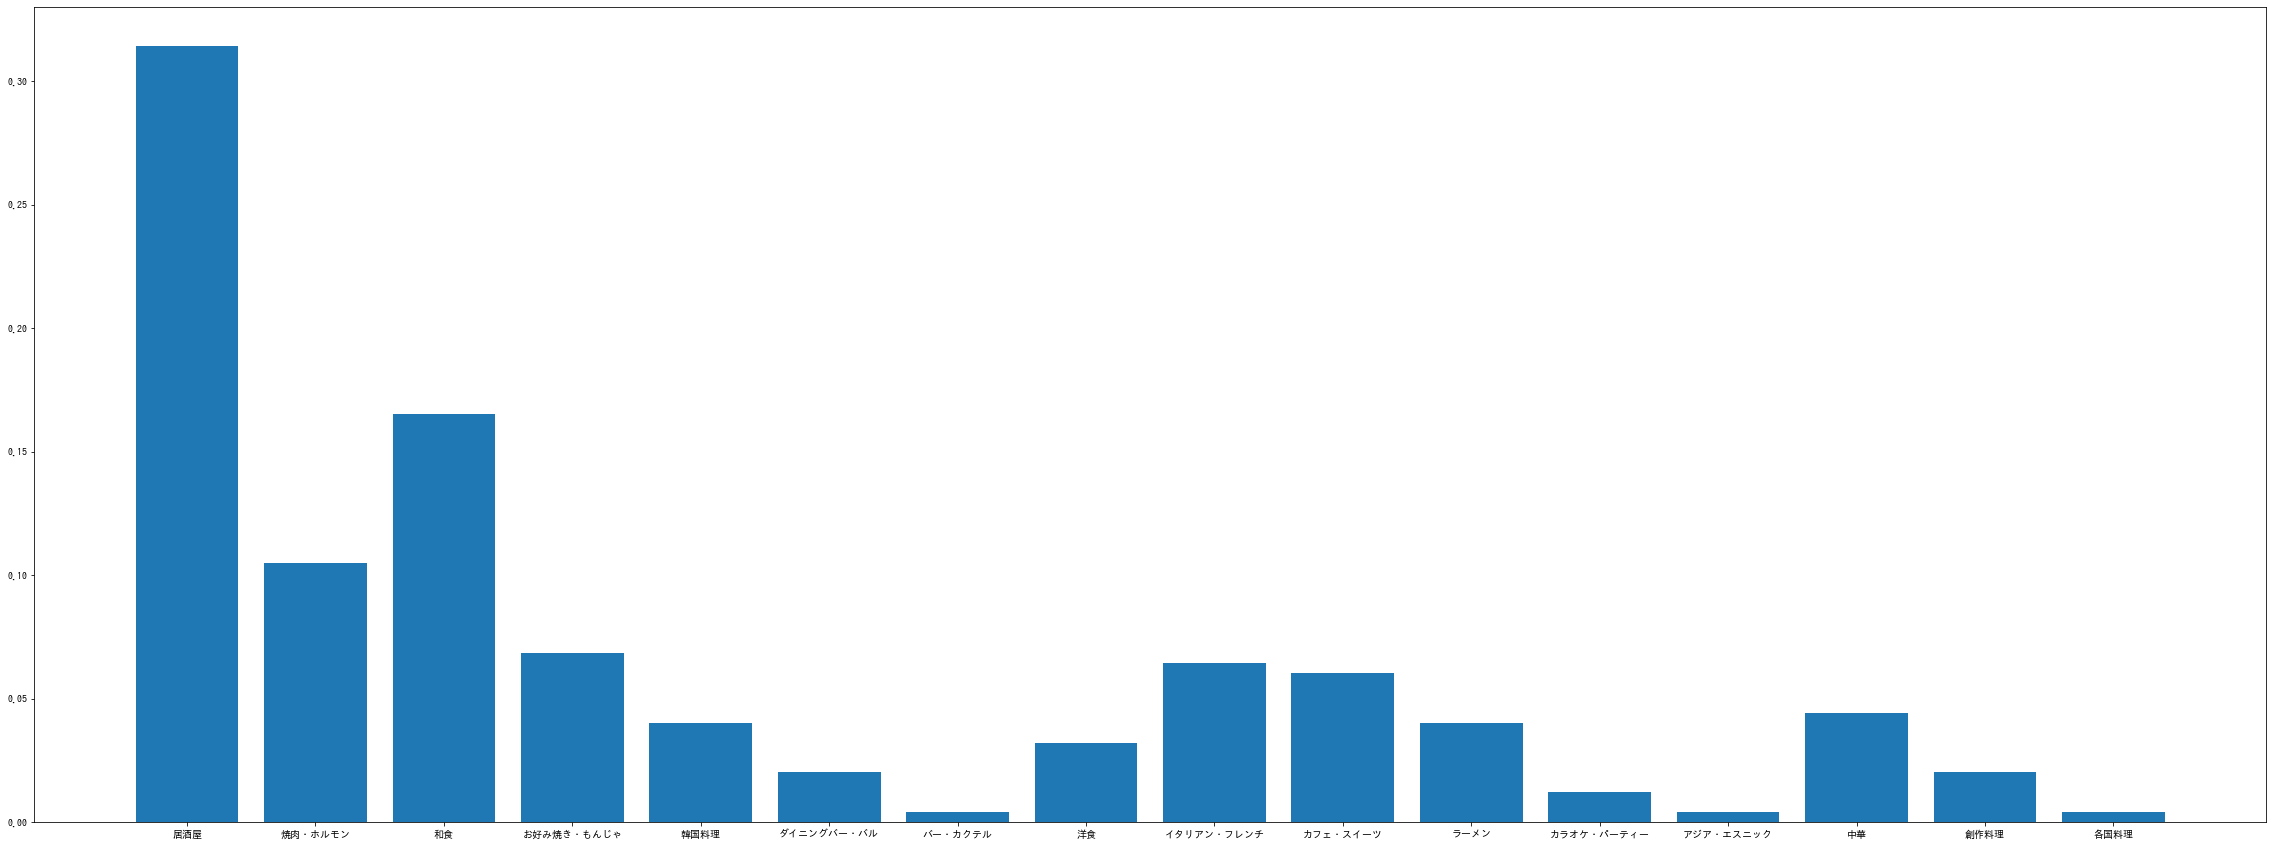

7 Y430 左京区・山科区
1007          韓国料理
1008    ダイニングバー・バル
1009    ダイニングバー・バル
1010            和食
1011    ダイニングバー・バル
Name: genre.code, dtype: object
Counter({'居酒屋': 44, '和食': 40, 'ダイニングバー・バル': 15, 'イタリアン・フレンチ': 14, '焼肉・ホルモン': 14, '中華': 12, 'カフェ・スイーツ': 10, 'お好み焼き・もんじゃ': 9, 'アジア・エスニック': 8, '洋食': 7, '創作料理': 6, 'ラーメン': 5, '各国料理': 4, '韓国料理': 1, 'バー・カクテル': 1})
['韓国料理' 'ダイニングバー・バル' '和食' '居酒屋' 'イタリアン・フレンチ' 'お好み焼き・もんじゃ' '焼肉・ホルモン' '洋食'
 '創作料理' '中華' '各国料理' 'アジア・エスニック' 'バー・カクテル' 'ラーメン' 'カフェ・スイーツ']
15
韓国料理 1
ダイニングバー・バル 15
和食 40
居酒屋 44
イタリアン・フレンチ 14
お好み焼き・もんじゃ 9
焼肉・ホルモン 14
洋食 7
創作料理 6
中華 12
各国料理 4
アジア・エスニック 8
バー・カクテル 1
ラーメン 5
カフェ・スイーツ 10
15 15 15


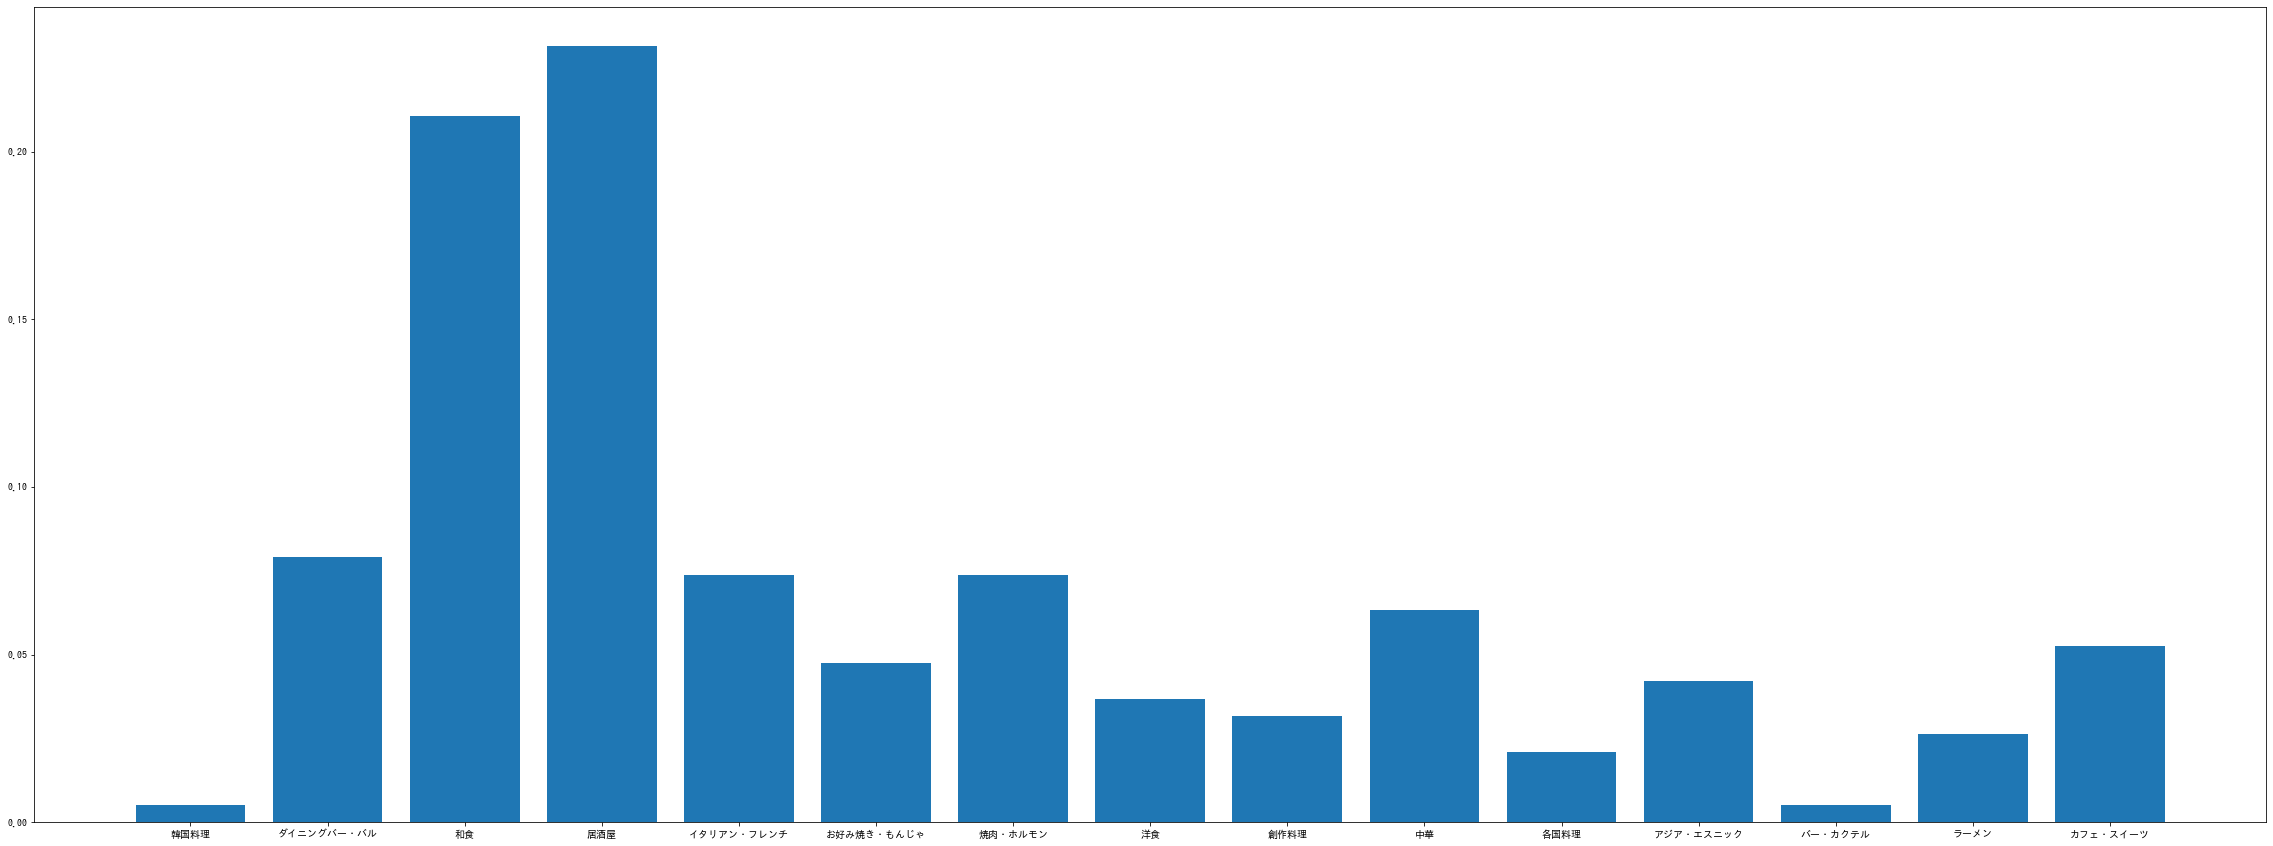

In [43]:
import collections
import matplotlib.pyplot as plt
data_ass=data[['band', 'barrier_free',  'card', 'charter', 'child',
       'course', 'english', 'free_drink', 'free_food',
       'horigotatsu', 'karaoke', 'ktai_coupon',  'lunch',
       'midnight', 'non_smoking', 'parking',  'pet',
       'private_room', 'show', 'tatami', 'tv', 'wifi', 'budget.code',
       'genre.code',
       'middle_area.code',
       ]]
data_ass['middle_area.code'].unique()
region_name_list=['Y432', 'Y365', 'Y433', 'Y431', 'Y435', 'Y434', 'Y430']


SUM_allregion=len(data_ass['middle_area.code'])

U=data_ass['genre.code'].unique()
print(U)
U=U.tolist()
F=len(U)
print(F)
Left=list(range(1,F+1))
allregion_food_genre=data_ass['genre.code']
allregion_count=collections.Counter(allregion_food_genre)    
print(allregion_count)
Height=[]
Labels=[]

for x,y in allregion_count.items():
    print(x,y)
    P=y/SUM_allregion
    Height.append(P)
    Labels.append(x)
print(len(Left),len(Height),len(Labels))
plt.bar(Left, Height,tick_label=Labels)
plt.rcParams['figure.figsize'] = (40,15)
plt.show()


for i,n in enumerate(region_name_list,1):
    height=[]
    labels=[]
    print(i,n,Yxxx[n])
    region_data=data_ass[data_ass['middle_area.code']==n]
    print(region_data['genre.code'][0:5])
    region_food_genre=region_data['genre.code']
    region_count=collections.Counter(region_food_genre)
    print(region_count)
    SUM=len(region_data['genre.code'])
    U=region_data['genre.code'].unique()
    print(U)
    U=U.tolist()
    F=len(U)
    print(F)
    left=list(range(1,F+1)) 
    for x,y in region_count.items():
        print(x,y)
        P=y/SUM
        height.append(P)
        labels.append(x)
    print(len(left),len(height),len(labels))
    plt.bar(left, height,tick_label=labels)
    plt.rcParams['figure.figsize'] = (40,15)
    plt.show()
    data_ass=data[['band', 'barrier_free',  'card', 'charter', 'child',
       'course', 'english', 'free_drink', 'free_food',
       'horigotatsu', 'karaoke', 'ktai_coupon',  'lunch',
       'midnight', 'non_smoking', 'parking',  'pet',
       'private_room', 'show', 'tatami', 'tv', 'wifi', 'budget.code',
       'genre.code',
       'middle_area.code',
       ]]

['焼肉・ホルモン' '韓国料理' 'ダイニングバー・バル' '居酒屋' 'イタリアン・フレンチ' 'カフェ・スイーツ' '和食'
 'お好み焼き・もんじゃ' 'アジア・エスニック' '各国料理' '洋食' '創作料理' '中華' 'カラオケ・パーティー' 'ラーメン'
 'バー・カクテル' 'その他']
17
Counter({'居酒屋': 539, '和食': 364, 'イタリアン・フレンチ': 172, 'ダイニングバー・バル': 136, '焼肉・ホルモン': 131, 'お好み焼き・もんじゃ': 71, 'カフェ・スイーツ': 67, '中華': 67, '洋食': 59, '韓国料理': 43, '創作料理': 39, 'ラーメン': 37, 'バー・カクテル': 32, 'アジア・エスニック': 25, 'カラオケ・パーティー': 14, '各国料理': 11, 'その他': 1})
焼肉・ホルモン 131
韓国料理 43
ダイニングバー・バル 136
居酒屋 539
イタリアン・フレンチ 172
カフェ・スイーツ 67
和食 364
お好み焼き・もんじゃ 71
アジア・エスニック 25
各国料理 11
洋食 59
創作料理 39
中華 67
カラオケ・パーティー 14
ラーメン 37
バー・カクテル 32
その他 1
17 17 17


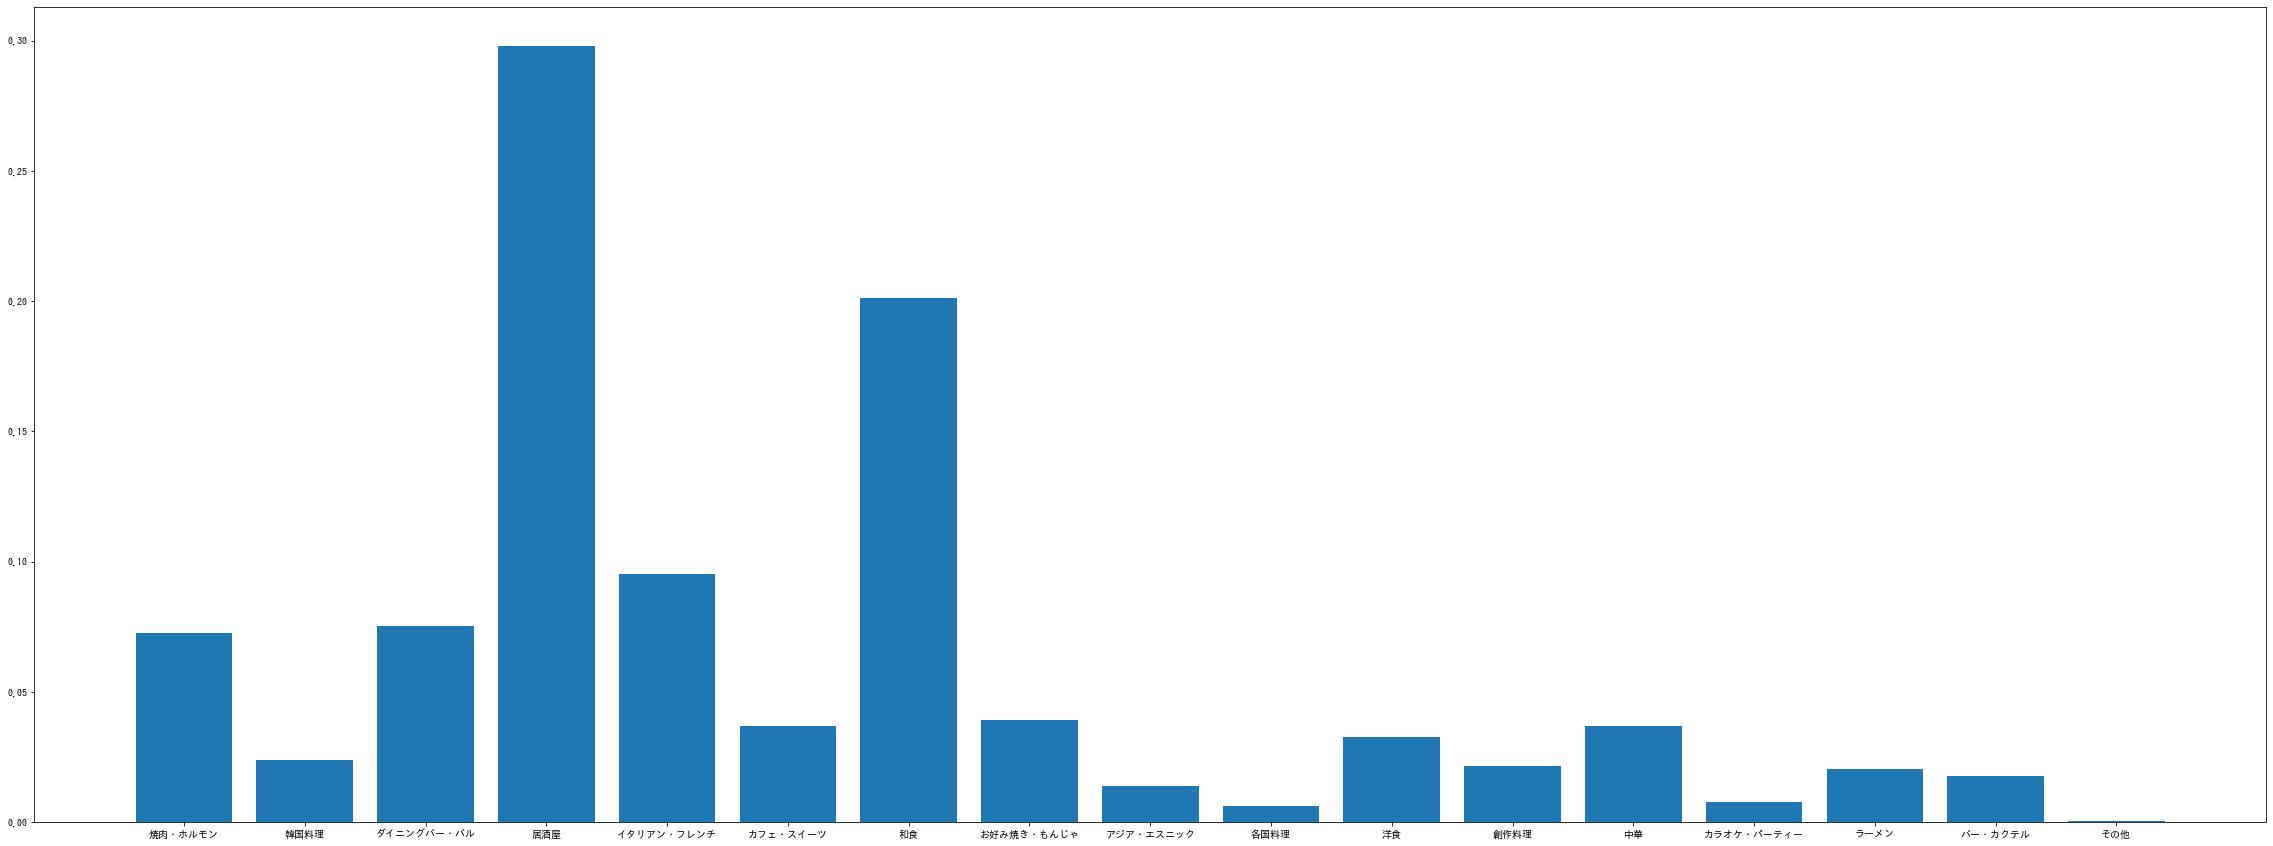

1 Y432 河原町・木屋町
0       焼肉・ホルモン
1          韓国料理
2          韓国料理
3    ダイニングバー・バル
4           居酒屋
Name: genre.code, dtype: object
Counter({'居酒屋': 112, 'ダイニングバー・バル': 63, '和食': 53, 'イタリアン・フレンチ': 35, '焼肉・ホルモン': 31, '韓国料理': 14, 'バー・カクテル': 14, 'カフェ・スイーツ': 13, 'お好み焼き・もんじゃ': 11, '中華': 10, 'アジア・エスニック': 5, '洋食': 5, 'カラオケ・パーティー': 5, 'ラーメン': 5, '各国料理': 4, '創作料理': 4})
['焼肉・ホルモン' '韓国料理' 'ダイニングバー・バル' '居酒屋' 'イタリアン・フレンチ' 'カフェ・スイーツ' '和食'
 'お好み焼き・もんじゃ' 'アジア・エスニック' '各国料理' '洋食' '創作料理' '中華' 'カラオケ・パーティー' 'ラーメン'
 'バー・カクテル']
16
焼肉・ホルモン 31
\\\\\\\\\\\ 131
韓国料理 14
\\\\\\\\\\\ 43
ダイニングバー・バル 63
\\\\\\\\\\\ 136
居酒屋 112
\\\\\\\\\\\ 539
イタリアン・フレンチ 35
\\\\\\\\\\\ 172
カフェ・スイーツ 13
\\\\\\\\\\\ 67
和食 53
\\\\\\\\\\\ 364
お好み焼き・もんじゃ 11
\\\\\\\\\\\ 71
アジア・エスニック 5
\\\\\\\\\\\ 25
各国料理 4
\\\\\\\\\\\ 11
洋食 5
\\\\\\\\\\\ 59
創作料理 4
\\\\\\\\\\\ 39
中華 10
\\\\\\\\\\\ 67
カラオケ・パーティー 5
\\\\\\\\\\\ 14
ラーメン 5
\\\\\\\\\\\ 37
バー・カクテル 14
\\\\\\\\\\\ 32
16 16 16 16 16 16


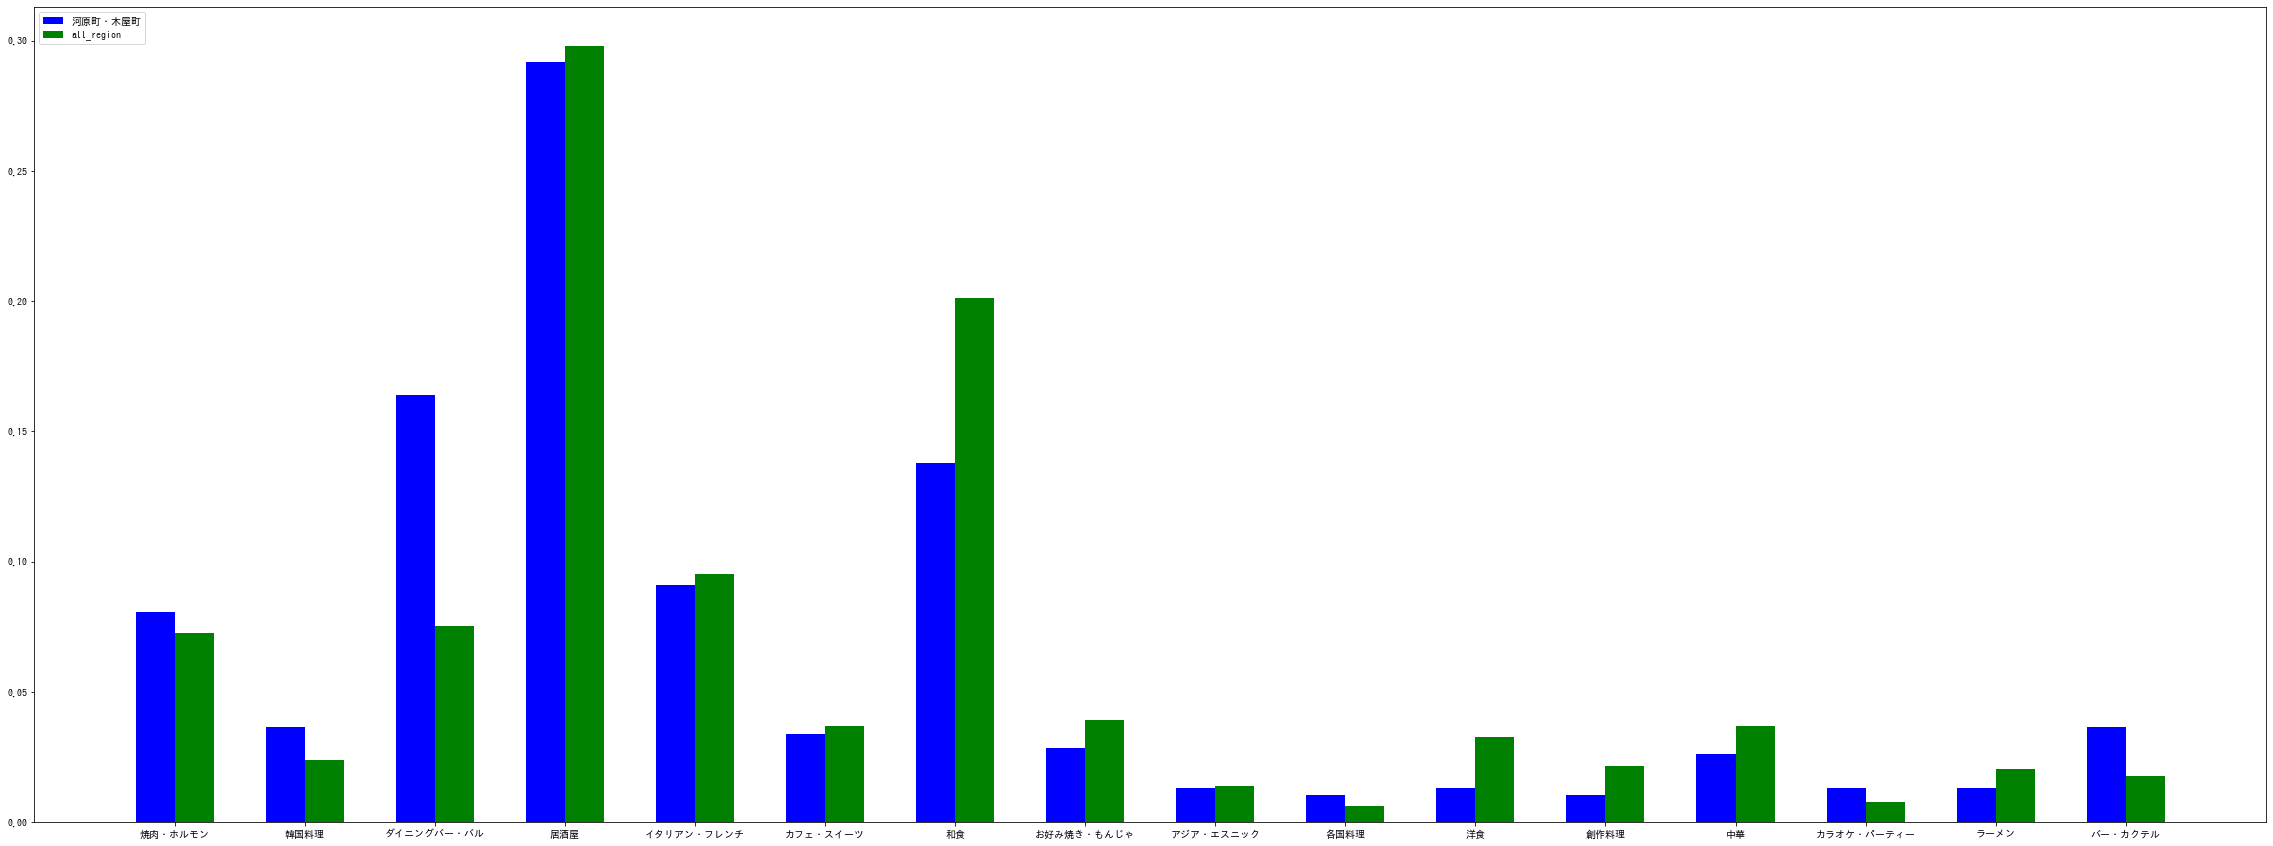

2 Y365 烏丸御池・四条烏丸
176    イタリアン・フレンチ
177       焼肉・ホルモン
178           居酒屋
179           居酒屋
180           居酒屋
Name: genre.code, dtype: object
Counter({'居酒屋': 121, '和食': 61, 'イタリアン・フレンチ': 49, '焼肉・ホルモン': 19, 'ダイニングバー・バル': 18, 'カフェ・スイーツ': 9, '中華': 6, '洋食': 6, 'アジア・エスニック': 4, 'バー・カクテル': 4, 'ラーメン': 4, '韓国料理': 3, 'お好み焼き・もんじゃ': 3, '創作料理': 3, 'その他': 1, 'カラオケ・パーティー': 1})
['イタリアン・フレンチ' '焼肉・ホルモン' '居酒屋' '和食' 'ダイニングバー・バル' '韓国料理' '中華' 'カフェ・スイーツ'
 'アジア・エスニック' '洋食' 'お好み焼き・もんじゃ' 'バー・カクテル' 'その他' '創作料理' 'ラーメン' 'カラオケ・パーティー']
16
イタリアン・フレンチ 49
\\\\\\\\\\\ 172
焼肉・ホルモン 19
\\\\\\\\\\\ 131
居酒屋 121
\\\\\\\\\\\ 539
和食 61
\\\\\\\\\\\ 364
ダイニングバー・バル 18
\\\\\\\\\\\ 136
韓国料理 3
\\\\\\\\\\\ 43
中華 6
\\\\\\\\\\\ 67
カフェ・スイーツ 9
\\\\\\\\\\\ 67
アジア・エスニック 4
\\\\\\\\\\\ 25
洋食 6
\\\\\\\\\\\ 59
お好み焼き・もんじゃ 3
\\\\\\\\\\\ 71
バー・カクテル 4
\\\\\\\\\\\ 32
その他 1
\\\\\\\\\\\ 1
創作料理 3
\\\\\\\\\\\ 39
ラーメン 4
\\\\\\\\\\\ 37
カラオケ・パーティー 1
\\\\\\\\\\\ 14
16 16 16 16 16 16


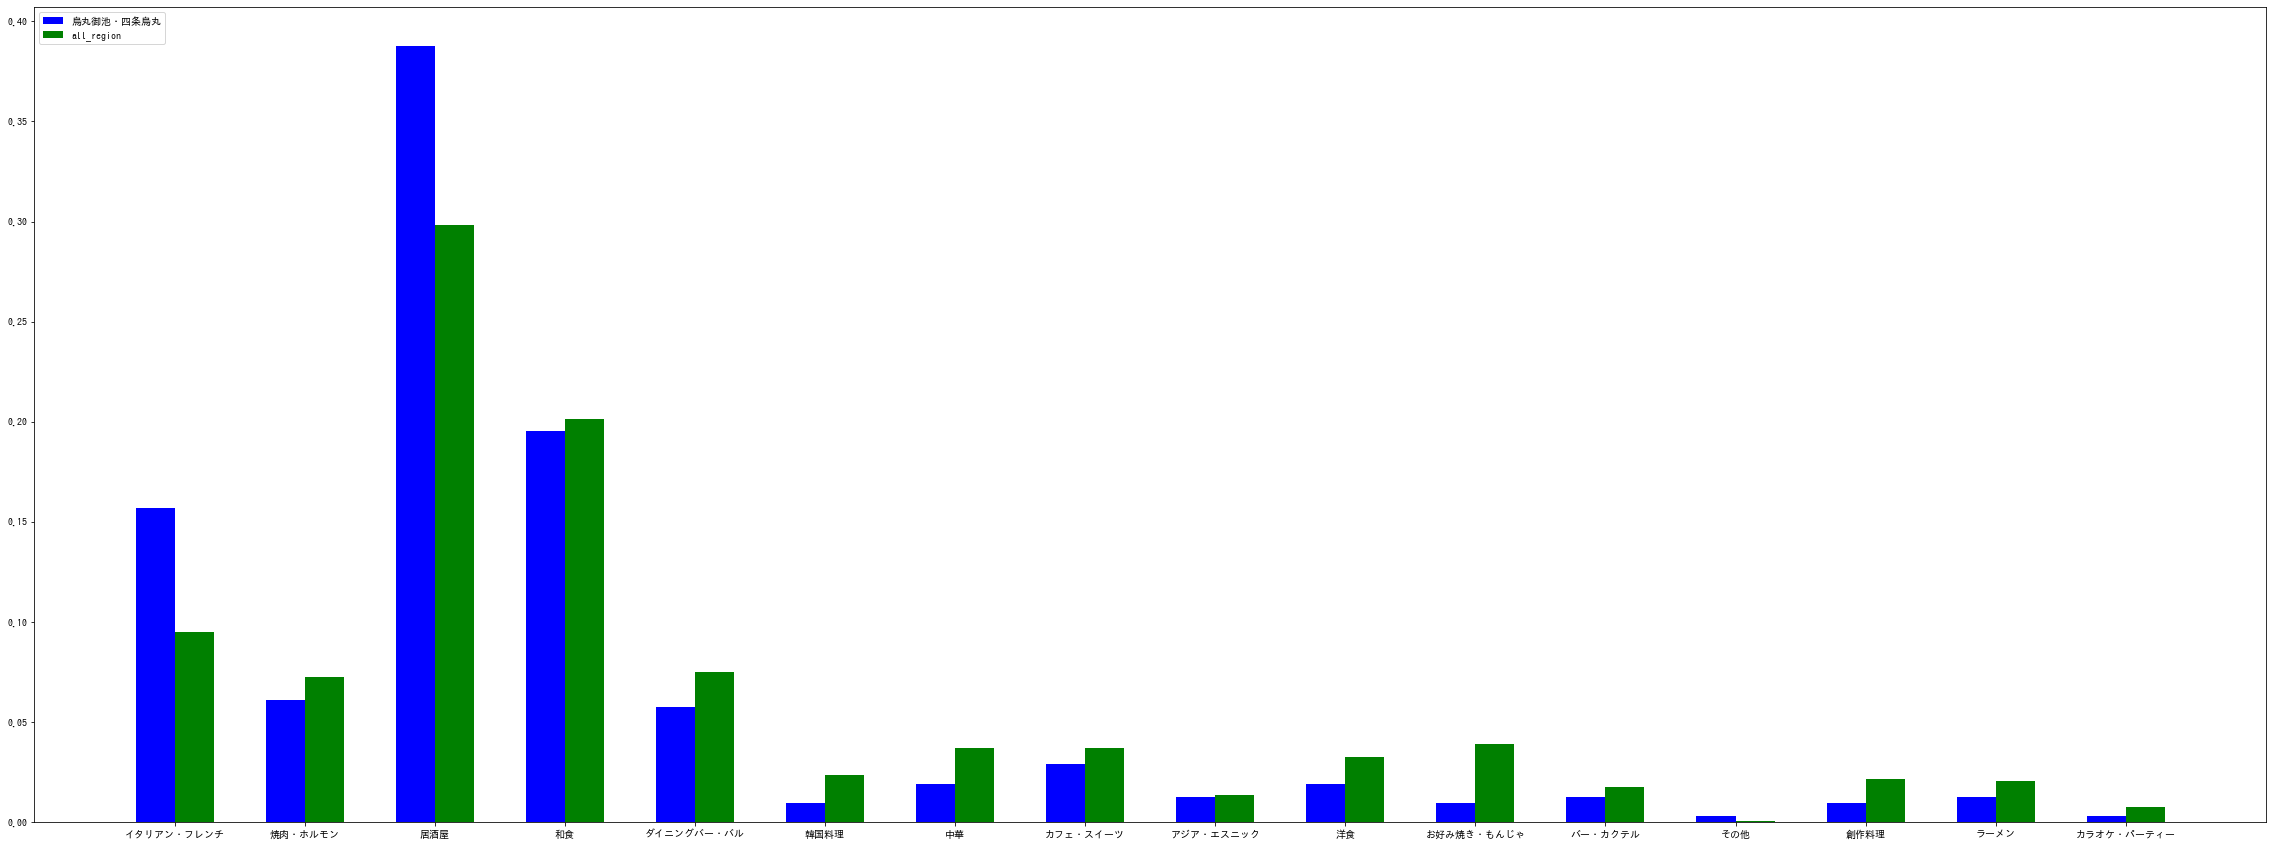

3 Y433 祇園・先斗町
429         和食
430        居酒屋
431    バー・カクテル
432        居酒屋
433         和食
Name: genre.code, dtype: object
Counter({'和食': 102, '居酒屋': 49, 'イタリアン・フレンチ': 22, 'ダイニングバー・バル': 15, '洋食': 14, '創作料理': 12, '焼肉・ホルモン': 11, 'バー・カクテル': 10, 'お好み焼き・もんじゃ': 10, '中華': 8, 'カフェ・スイーツ': 5, 'ラーメン': 2, 'カラオケ・パーティー': 1, '韓国料理': 1, 'アジア・エスニック': 1})
['和食' '居酒屋' 'バー・カクテル' '洋食' '焼肉・ホルモン' 'ダイニングバー・バル' 'イタリアン・フレンチ' '中華' '創作料理'
 'カラオケ・パーティー' 'カフェ・スイーツ' 'お好み焼き・もんじゃ' '韓国料理' 'アジア・エスニック' 'ラーメン']
15
和食 102
\\\\\\\\\\\ 364
居酒屋 49
\\\\\\\\\\\ 539
バー・カクテル 10
\\\\\\\\\\\ 32
洋食 14
\\\\\\\\\\\ 59
焼肉・ホルモン 11
\\\\\\\\\\\ 131
ダイニングバー・バル 15
\\\\\\\\\\\ 136
イタリアン・フレンチ 22
\\\\\\\\\\\ 172
中華 8
\\\\\\\\\\\ 67
創作料理 12
\\\\\\\\\\\ 39
カラオケ・パーティー 1
\\\\\\\\\\\ 14
カフェ・スイーツ 5
\\\\\\\\\\\ 67
お好み焼き・もんじゃ 10
\\\\\\\\\\\ 71
韓国料理 1
\\\\\\\\\\\ 43
アジア・エスニック 1
\\\\\\\\\\\ 25
ラーメン 2
\\\\\\\\\\\ 37
15 15 15 15 15 15


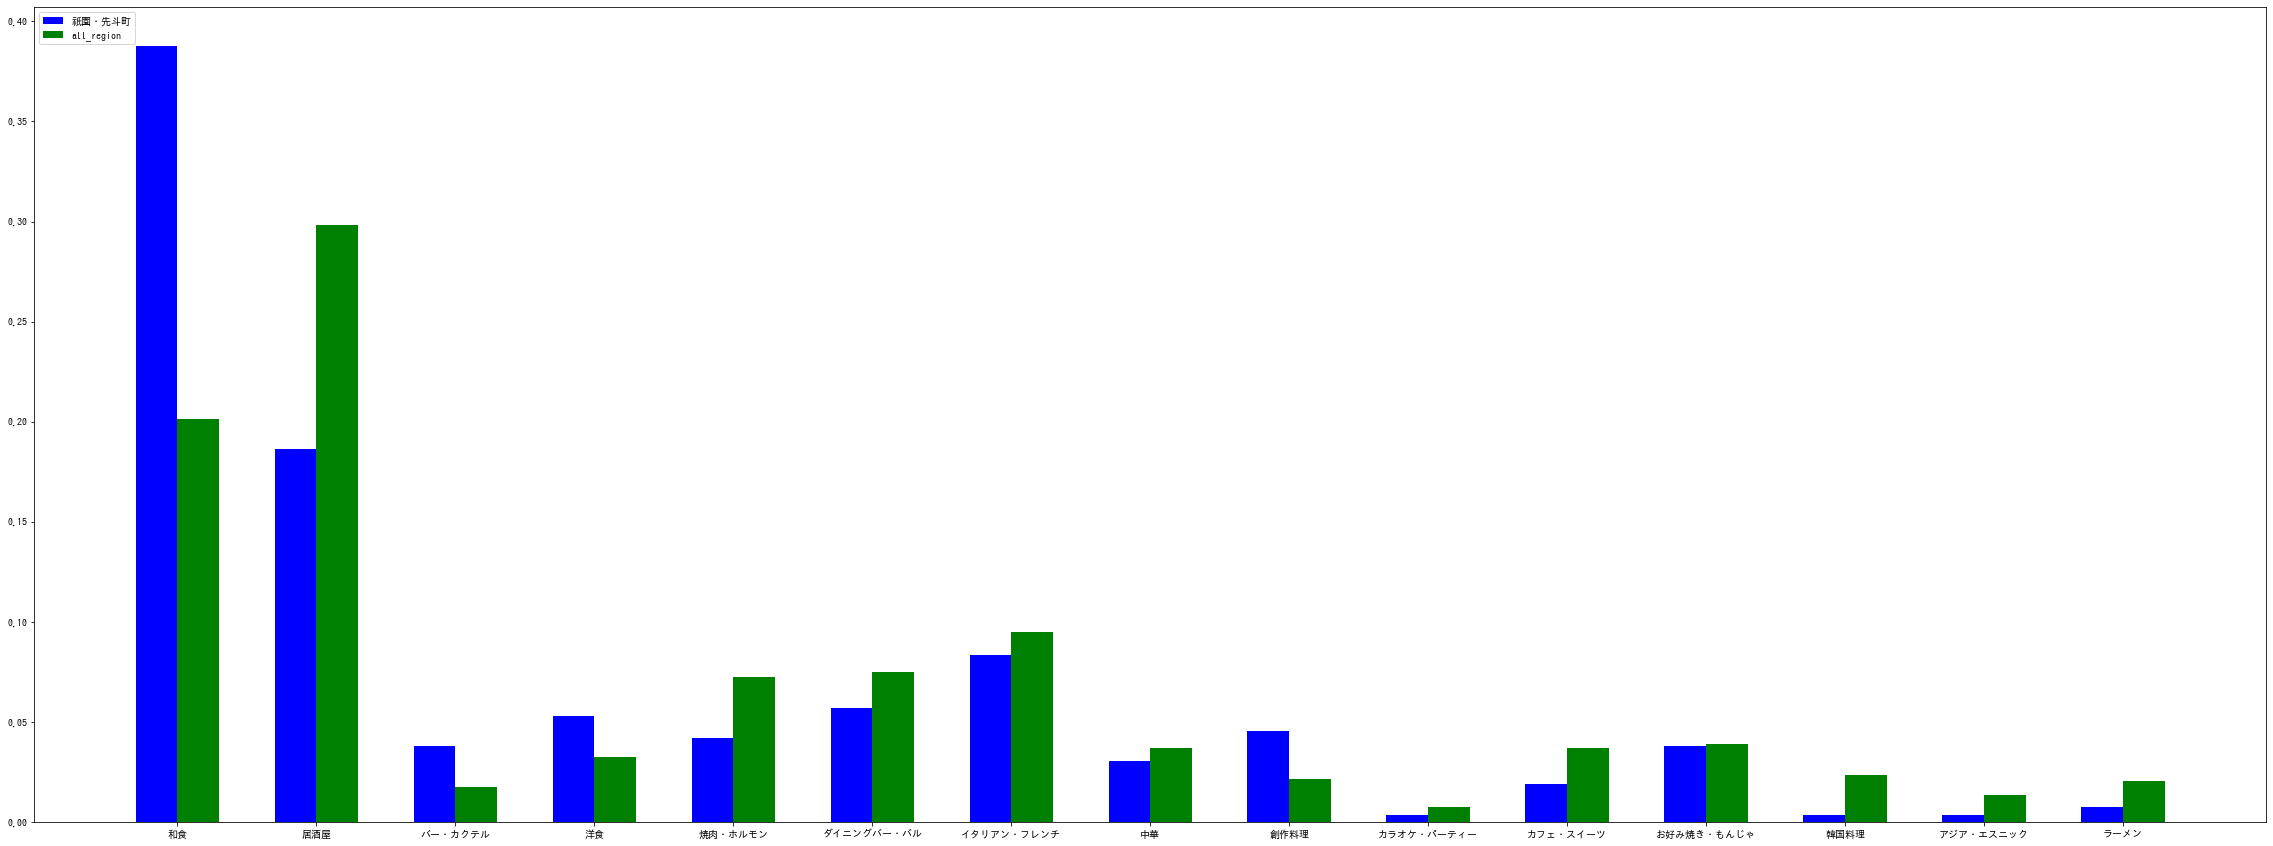

4 Y431 北区・上京区
634           居酒屋
635           居酒屋
636           居酒屋
637    イタリアン・フレンチ
638           居酒屋
Name: genre.code, dtype: object
Counter({'居酒屋': 35, '和食': 29, '中華': 13, 'カフェ・スイーツ': 12, '洋食': 11, 'イタリアン・フレンチ': 9, 'お好み焼き・もんじゃ': 6, '焼肉・ホルモン': 6, 'ラーメン': 5, 'ダイニングバー・バル': 4, 'アジア・エスニック': 4, '韓国料理': 4, '創作料理': 2, 'カラオケ・パーティー': 1})
['居酒屋' 'イタリアン・フレンチ' '洋食' 'ダイニングバー・バル' '和食' 'アジア・エスニック' 'お好み焼き・もんじゃ'
 'カフェ・スイーツ' '創作料理' '中華' '韓国料理' 'カラオケ・パーティー' 'ラーメン' '焼肉・ホルモン']
14
居酒屋 35
\\\\\\\\\\\ 539
イタリアン・フレンチ 9
\\\\\\\\\\\ 172
洋食 11
\\\\\\\\\\\ 59
ダイニングバー・バル 4
\\\\\\\\\\\ 136
和食 29
\\\\\\\\\\\ 364
アジア・エスニック 4
\\\\\\\\\\\ 25
お好み焼き・もんじゃ 6
\\\\\\\\\\\ 71
カフェ・スイーツ 12
\\\\\\\\\\\ 67
創作料理 2
\\\\\\\\\\\ 39
中華 13
\\\\\\\\\\\ 67
韓国料理 4
\\\\\\\\\\\ 43
カラオケ・パーティー 1
\\\\\\\\\\\ 14
ラーメン 5
\\\\\\\\\\\ 37
焼肉・ホルモン 6
\\\\\\\\\\\ 131
14 14 14 14 14 14


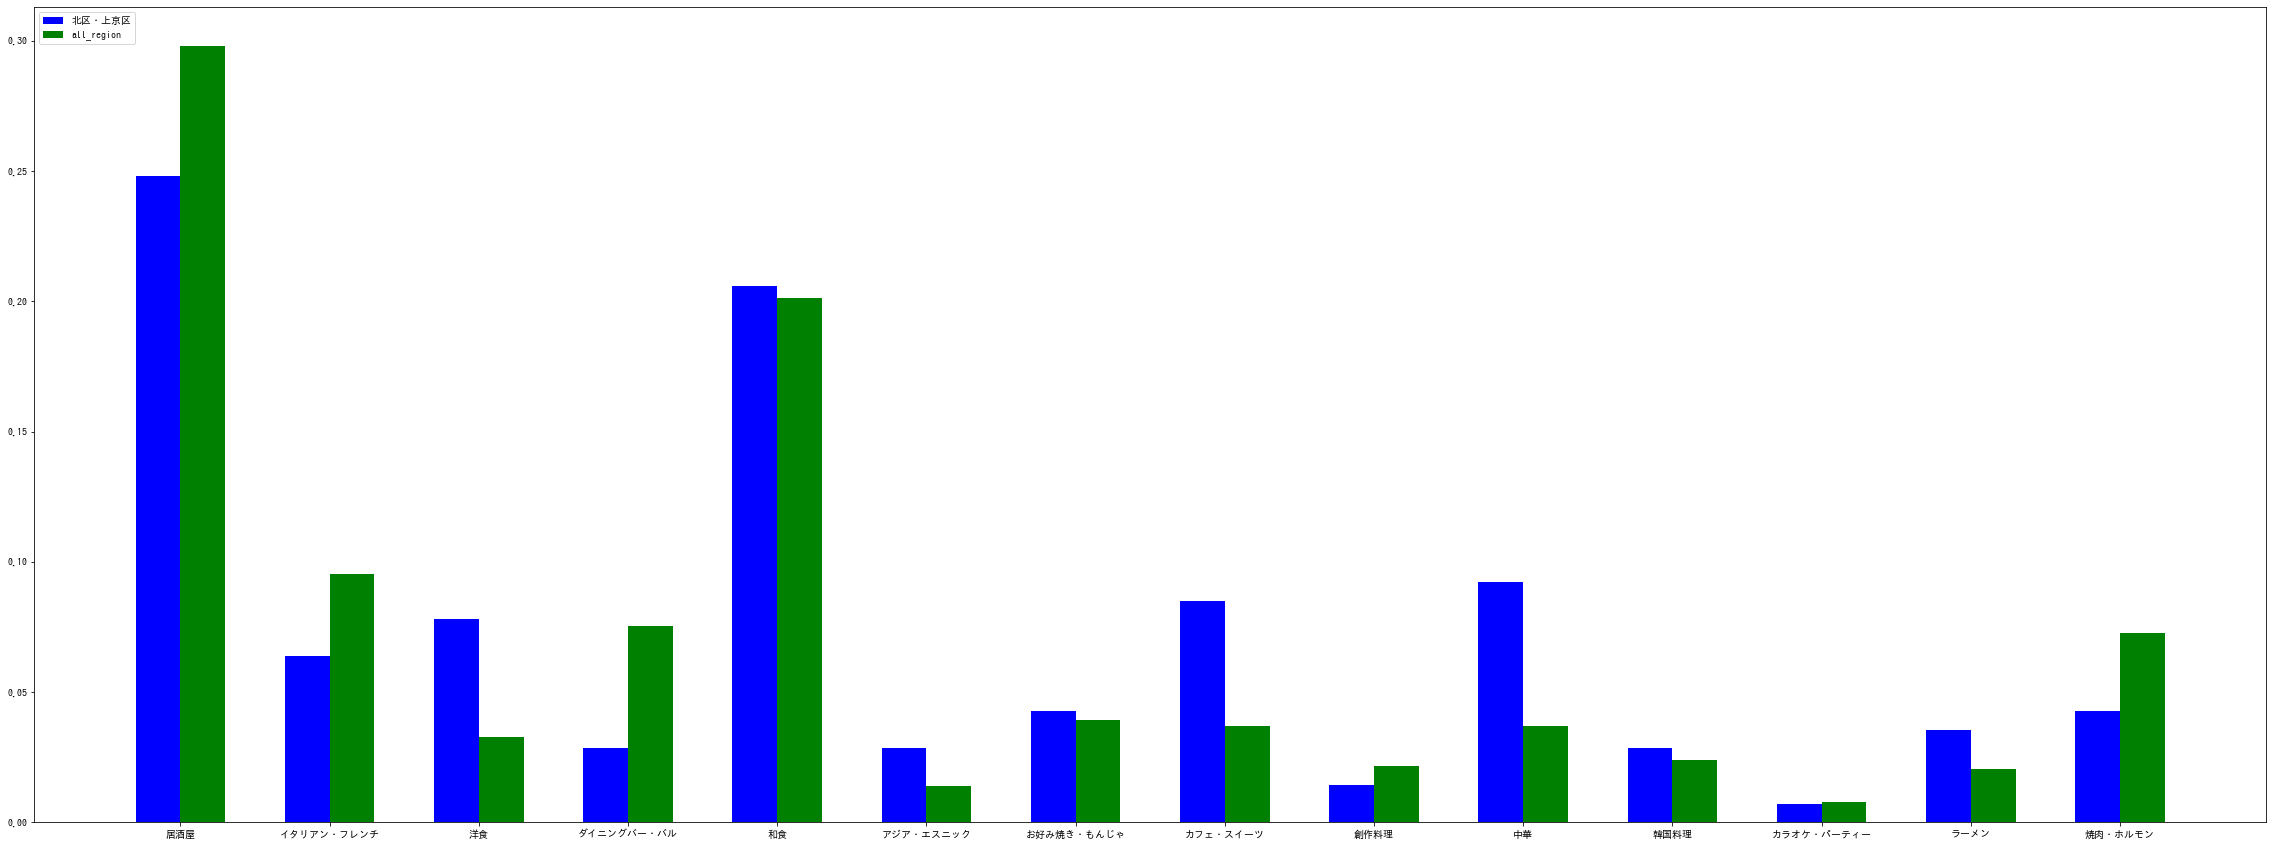

5 Y435 烏丸五条・京都駅周辺
650    ダイニングバー・バル
651    イタリアン・フレンチ
652           居酒屋
653           居酒屋
654           居酒屋
Name: genre.code, dtype: object
Counter({'居酒屋': 100, '和食': 38, 'イタリアン・フレンチ': 27, '焼肉・ホルモン': 24, 'ダイニングバー・バル': 16, 'お好み焼き・もんじゃ': 15, '韓国料理': 10, '洋食': 8, '中華': 7, '創作料理': 7, 'ラーメン': 6, 'カフェ・スイーツ': 3, 'カラオケ・パーティー': 3, 'バー・カクテル': 2, '各国料理': 2, 'アジア・エスニック': 2})
['ダイニングバー・バル' 'イタリアン・フレンチ' '居酒屋' '焼肉・ホルモン' '和食' '中華' 'お好み焼き・もんじゃ' 'ラーメン'
 '韓国料理' '洋食' 'カフェ・スイーツ' 'バー・カクテル' '各国料理' '創作料理' 'カラオケ・パーティー' 'アジア・エスニック']
16
ダイニングバー・バル 16
\\\\\\\\\\\ 136
イタリアン・フレンチ 27
\\\\\\\\\\\ 172
居酒屋 100
\\\\\\\\\\\ 539
焼肉・ホルモン 24
\\\\\\\\\\\ 131
和食 38
\\\\\\\\\\\ 364
中華 7
\\\\\\\\\\\ 67
お好み焼き・もんじゃ 15
\\\\\\\\\\\ 71
ラーメン 6
\\\\\\\\\\\ 37
韓国料理 10
\\\\\\\\\\\ 43
洋食 8
\\\\\\\\\\\ 59
カフェ・スイーツ 3
\\\\\\\\\\\ 67
バー・カクテル 2
\\\\\\\\\\\ 32
各国料理 2
\\\\\\\\\\\ 11
創作料理 7
\\\\\\\\\\\ 39
カラオケ・パーティー 3
\\\\\\\\\\\ 14
アジア・エスニック 2
\\\\\\\\\\\ 25
16 16 16 16 16 16


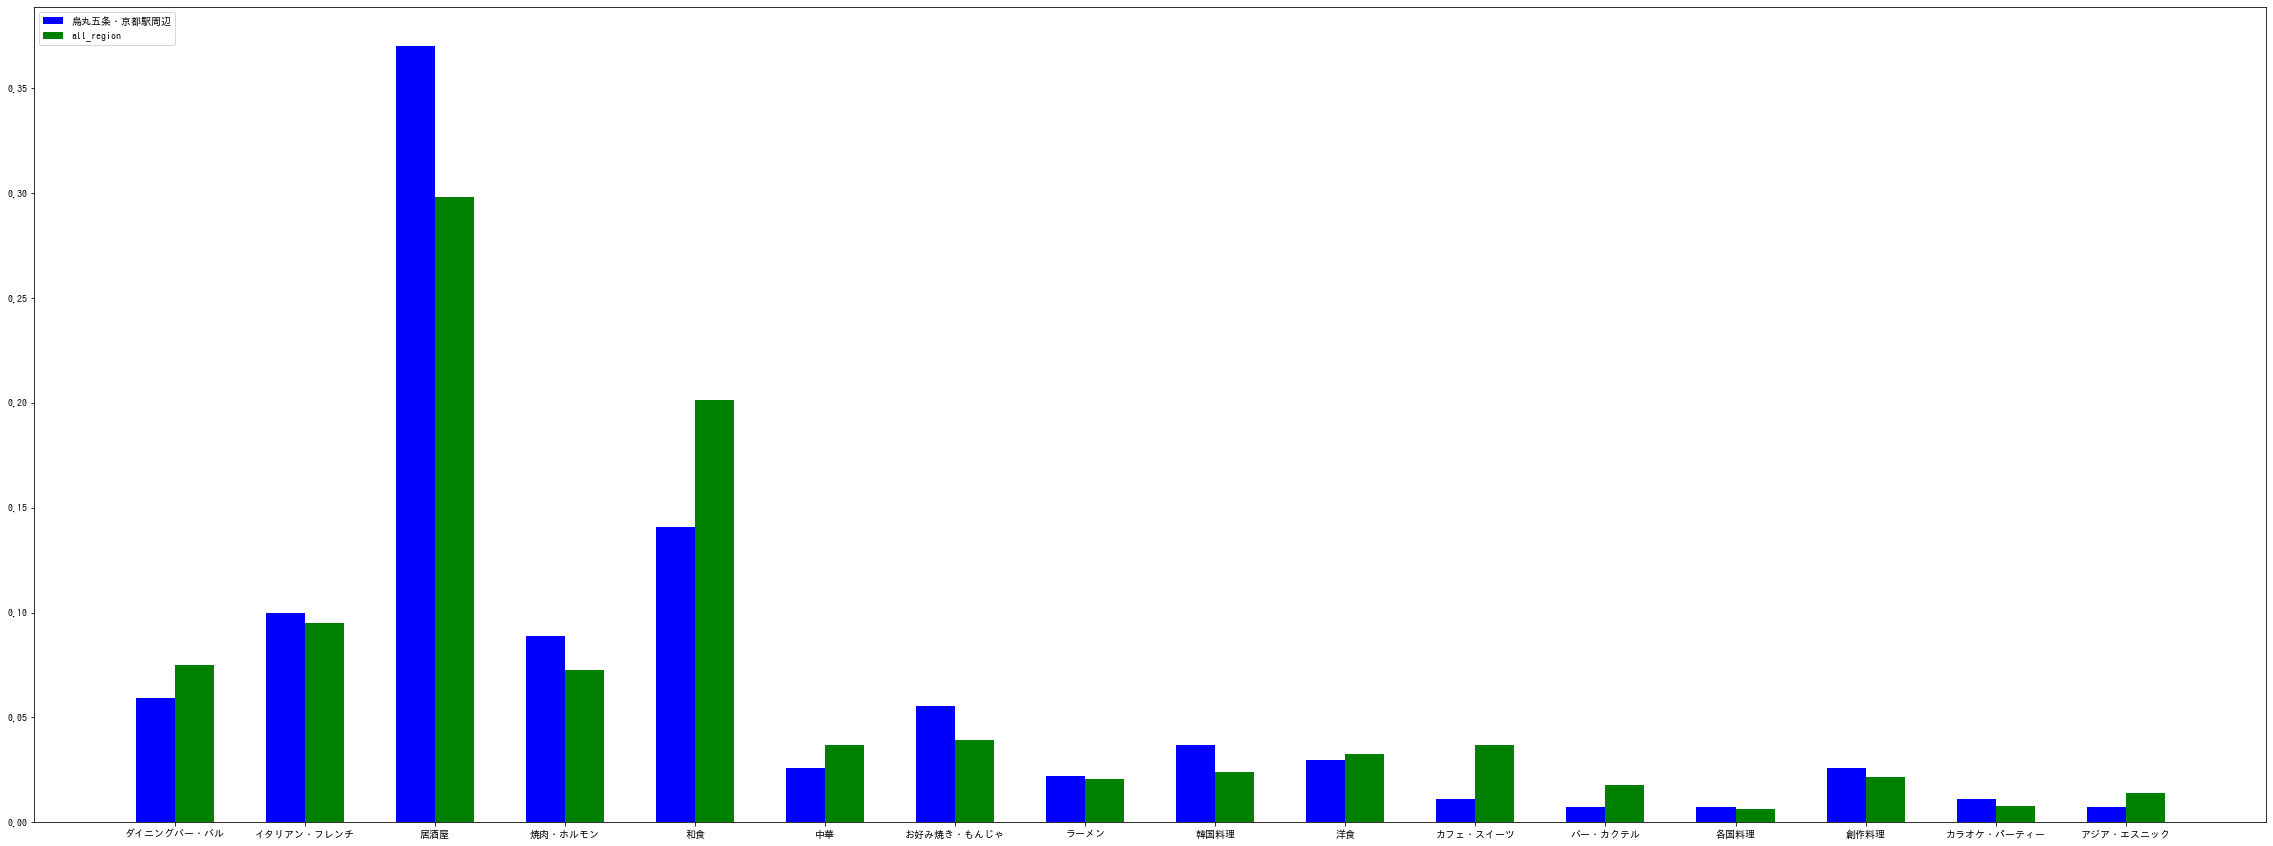

6 Y434 四条大宮・西院・右京区・西京区
885        居酒屋
886        居酒屋
887    焼肉・ホルモン
888    焼肉・ホルモン
889    焼肉・ホルモン
Name: genre.code, dtype: object
Counter({'居酒屋': 78, '和食': 41, '焼肉・ホルモン': 26, 'お好み焼き・もんじゃ': 17, 'イタリアン・フレンチ': 16, 'カフェ・スイーツ': 15, '中華': 11, '韓国料理': 10, 'ラーメン': 10, '洋食': 8, 'ダイニングバー・バル': 5, '創作料理': 5, 'カラオケ・パーティー': 3, 'バー・カクテル': 1, 'アジア・エスニック': 1, '各国料理': 1})
['居酒屋' '焼肉・ホルモン' '和食' 'お好み焼き・もんじゃ' '韓国料理' 'ダイニングバー・バル' 'バー・カクテル' '洋食'
 'イタリアン・フレンチ' 'カフェ・スイーツ' 'ラーメン' 'カラオケ・パーティー' 'アジア・エスニック' '中華' '創作料理'
 '各国料理']
16
居酒屋 78
\\\\\\\\\\\ 539
焼肉・ホルモン 26
\\\\\\\\\\\ 131
和食 41
\\\\\\\\\\\ 364
お好み焼き・もんじゃ 17
\\\\\\\\\\\ 71
韓国料理 10
\\\\\\\\\\\ 43
ダイニングバー・バル 5
\\\\\\\\\\\ 136
バー・カクテル 1
\\\\\\\\\\\ 32
洋食 8
\\\\\\\\\\\ 59
イタリアン・フレンチ 16
\\\\\\\\\\\ 172
カフェ・スイーツ 15
\\\\\\\\\\\ 67
ラーメン 10
\\\\\\\\\\\ 37
カラオケ・パーティー 3
\\\\\\\\\\\ 14
アジア・エスニック 1
\\\\\\\\\\\ 25
中華 11
\\\\\\\\\\\ 67
創作料理 5
\\\\\\\\\\\ 39
各国料理 1
\\\\\\\\\\\ 11
16 16 16 16 16 16


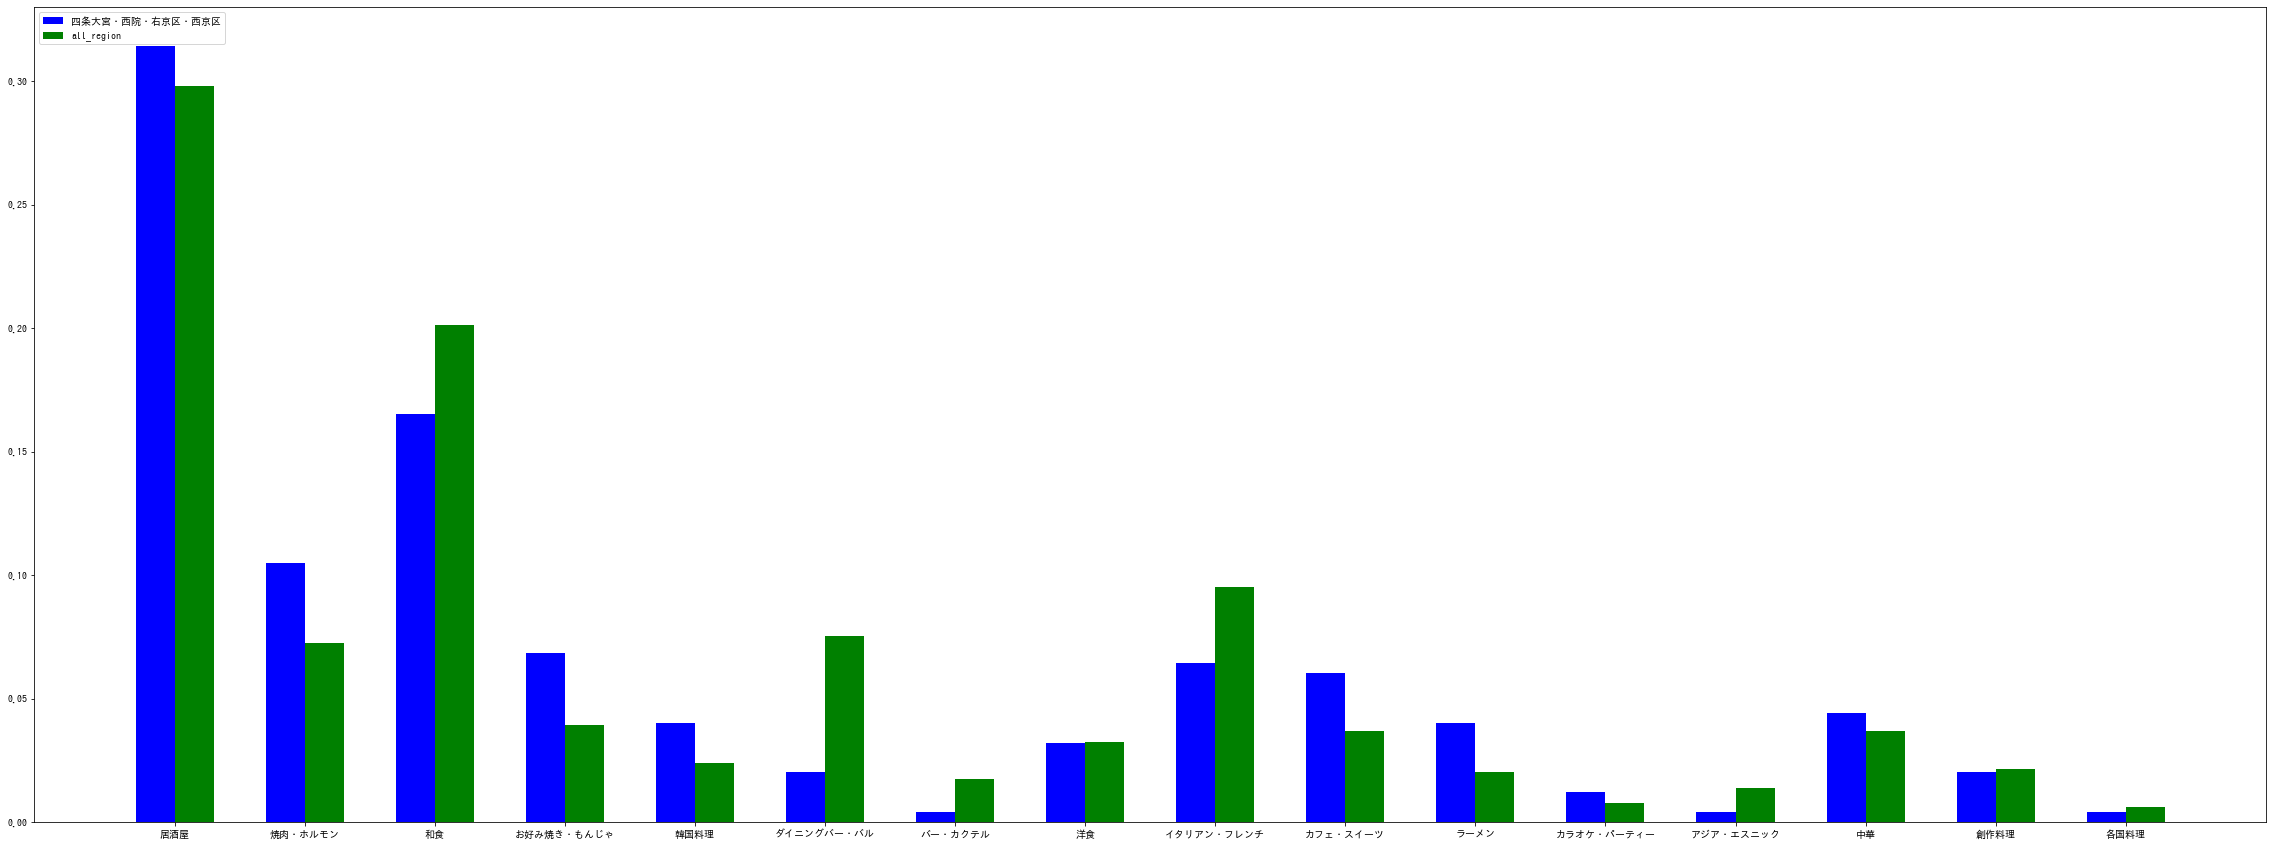

7 Y430 左京区・山科区
1007          韓国料理
1008    ダイニングバー・バル
1009    ダイニングバー・バル
1010            和食
1011    ダイニングバー・バル
Name: genre.code, dtype: object
Counter({'居酒屋': 44, '和食': 40, 'ダイニングバー・バル': 15, 'イタリアン・フレンチ': 14, '焼肉・ホルモン': 14, '中華': 12, 'カフェ・スイーツ': 10, 'お好み焼き・もんじゃ': 9, 'アジア・エスニック': 8, '洋食': 7, '創作料理': 6, 'ラーメン': 5, '各国料理': 4, '韓国料理': 1, 'バー・カクテル': 1})
['韓国料理' 'ダイニングバー・バル' '和食' '居酒屋' 'イタリアン・フレンチ' 'お好み焼き・もんじゃ' '焼肉・ホルモン' '洋食'
 '創作料理' '中華' '各国料理' 'アジア・エスニック' 'バー・カクテル' 'ラーメン' 'カフェ・スイーツ']
15
韓国料理 1
\\\\\\\\\\\ 43
ダイニングバー・バル 15
\\\\\\\\\\\ 136
和食 40
\\\\\\\\\\\ 364
居酒屋 44
\\\\\\\\\\\ 539
イタリアン・フレンチ 14
\\\\\\\\\\\ 172
お好み焼き・もんじゃ 9
\\\\\\\\\\\ 71
焼肉・ホルモン 14
\\\\\\\\\\\ 131
洋食 7
\\\\\\\\\\\ 59
創作料理 6
\\\\\\\\\\\ 39
中華 12
\\\\\\\\\\\ 67
各国料理 4
\\\\\\\\\\\ 11
アジア・エスニック 8
\\\\\\\\\\\ 25
バー・カクテル 1
\\\\\\\\\\\ 32
ラーメン 5
\\\\\\\\\\\ 37
カフェ・スイーツ 10
\\\\\\\\\\\ 67
15 15 15 15 15 15


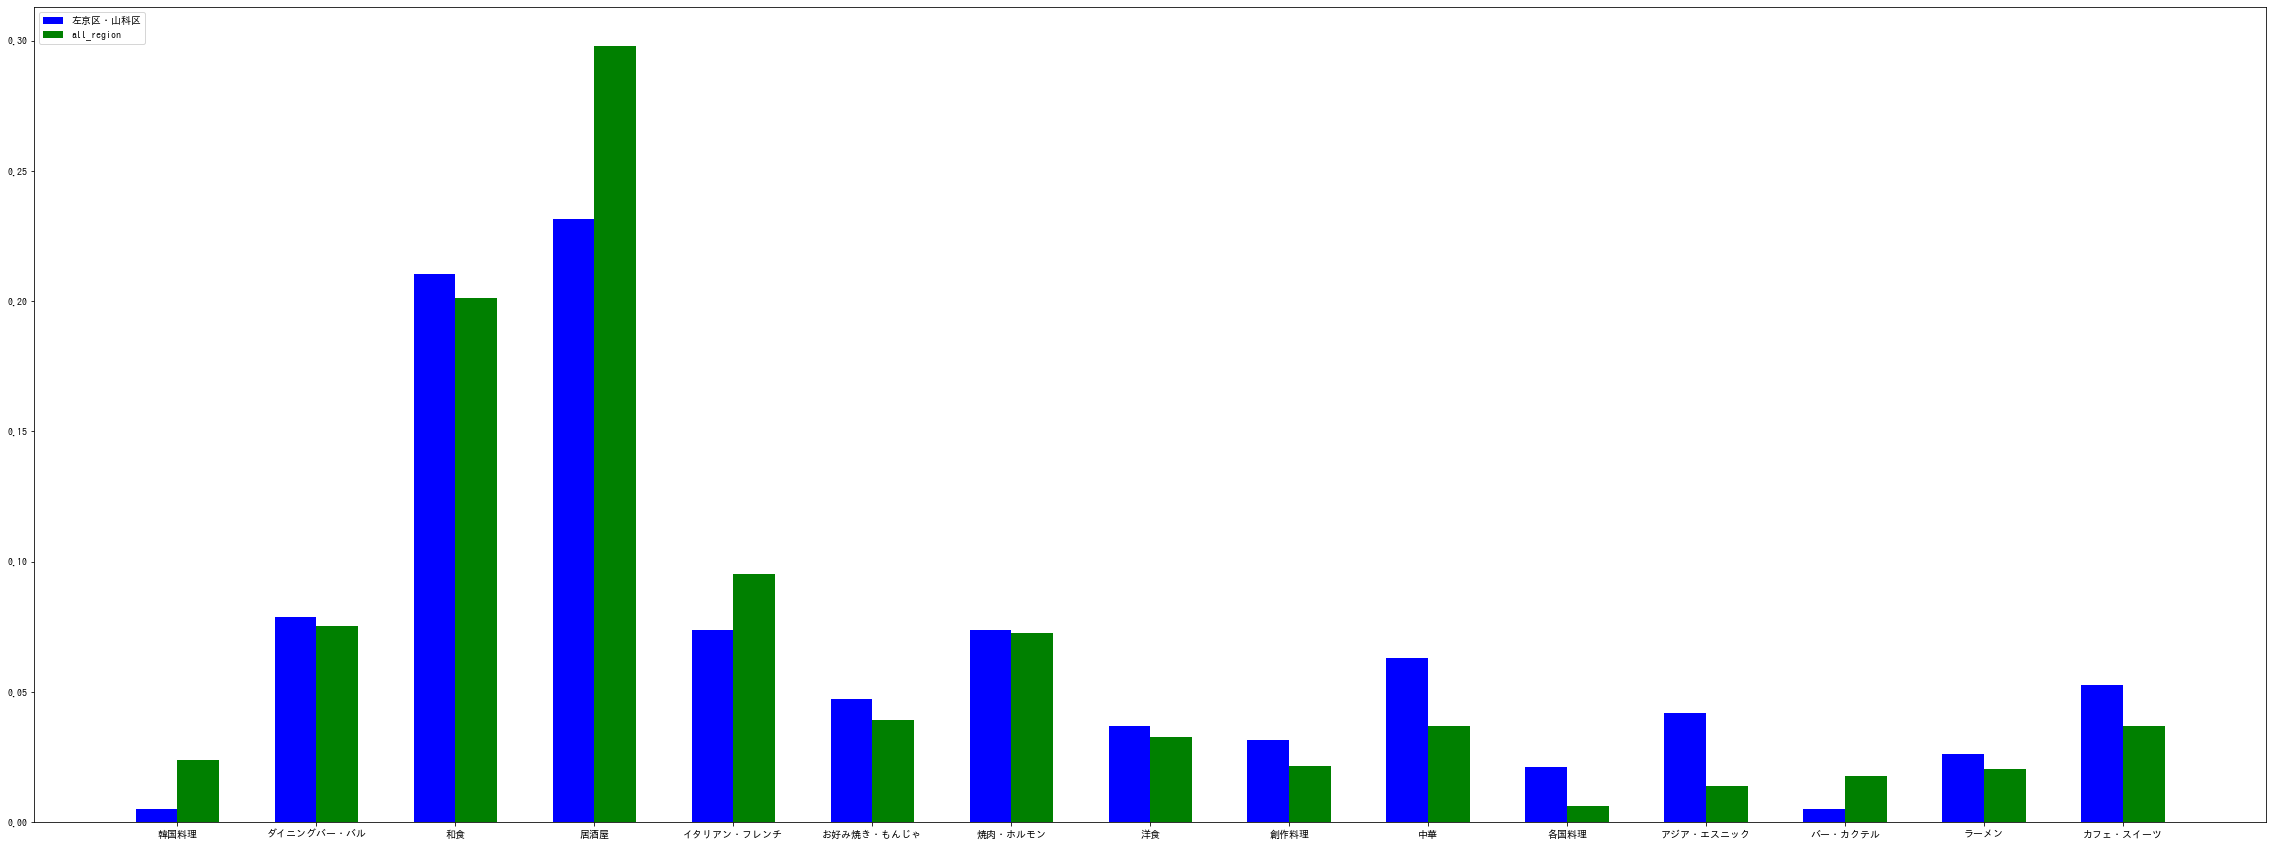

In [44]:
data_ass=data[['band', 'barrier_free',  'card', 'charter', 'child',
       'course', 'english', 'free_drink', 'free_food',
       'horigotatsu', 'karaoke', 'ktai_coupon',  'lunch',
       'midnight', 'non_smoking', 'parking',  'pet',
       'private_room', 'show', 'tatami', 'tv', 'wifi', 'budget.code',
       'genre.code',
       'middle_area.code',
       ]]
data_ass['middle_area.code'].unique()
region_name_list=['Y432', 'Y365', 'Y433', 'Y431', 'Y435', 'Y434', 'Y430']


SUM_allregion=len(data_ass['middle_area.code'])

U=data_ass['genre.code'].unique()
print(U)
U=U.tolist()
F=len(U)
print(F)

allregion_food_genre=data_ass['genre.code']
allregion_count=collections.Counter(allregion_food_genre)    
print(allregion_count)
Height=[]
Labels=[]

for x,y in allregion_count.items():
    print(x,y)
    P=y/SUM_allregion
    Height.append(P)
    Labels.append(x)
print(len(Left),len(Height),len(Labels))
Left=np.arange(len(Height))
plt.bar(Left, Height,tick_label=Labels)
plt.rcParams['figure.figsize'] = (40,15)
plt.show()

width = 0.3
for i,n in enumerate(region_name_list,1):
    height=[]
    labels=[]
    Height=[]
    Labels=[]
    print(i,n,Yxxx[n])
    region_data=data_ass[data_ass['middle_area.code']==n]
    print(region_data['genre.code'][0:5])
    region_food_genre=region_data['genre.code']
    region_count=collections.Counter(region_food_genre)
    print(region_count)
    SUM=len(region_data['genre.code'])
    U=region_data['genre.code'].unique()
    print(U)
    U=U.tolist()
    F=len(U)
    print(F)
    #left=list(range(1,F+1)) 
    for x,y in region_count.items():
        print(x,y)
        p=y/SUM
        height.append(p)
        labels.append(x)
        Y=allregion_count[x]
        print('\\\\\\\\\\\\\\\\\\\\\\',Y)
        P=Y/SUM_allregion
        Height.append(P)
        Labels.append(x)
    left = np.arange(len(height))
    Left = np.arange(len(Height))
    print(len(left),len(height),len(labels),len(Left),len(Height),len(Labels))
    
    plt.bar(left, height,tick_label=labels,color='b',width=width,align="center",label=Yxxx[n])
    plt.bar(left+width, Height,tick_label=labels,color='g',width=width,align="center",label='all_region')
    plt.rcParams['figure.figsize'] = (40,15)
    plt.legend(loc=2)
    plt.xticks(left + width/2, labels)
    plt.show()
    data_ass=data[['band', 'barrier_free',  'card', 'charter', 'child',
       'course', 'english', 'free_drink', 'free_food',
       'horigotatsu', 'karaoke', 'ktai_coupon',  'lunch',
       'midnight', 'non_smoking', 'parking',  'pet',
       'private_room', 'show', 'tatami', 'tv', 'wifi', 'budget.code',
       'genre.code',
       'middle_area.code',
       ]]

In [45]:
for s,t in allregion_count.items():
    print(allregion_count[s])

131
43
136
539
172
67
364
71
25
11
59
39
67
14
37
32
1


In [46]:
#data_ass=pd.get_dummies(data_ass.astype(object),columns=['genre.code','middle_area.code','budget.code'])
data_ass.to_csv('restaurant_kyoto_ass.csv',index=True,encoding='utf_8_sig',sep=',')
#data_ass.to_csv('restaurant_kyoto_ass_new.csv',index=True,encoding='cp932')


In [47]:
data_ass.head()

,band,barrier_free,card,charter,child,course,english,free_drink,free_food,horigotatsu,...,parking,pet,private_room,show,tatami,tv,wifi,budget.code,genre.code,middle_area.code
0,0,0,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,2500.0,焼肉・ホルモン,Y432
1,0,0,0,1,1,1,0,1,1,1,...,0,0,1,0,1,0,0,2500.0,韓国料理,Y432
2,0,0,1,0,2,1,0,0,0,0,...,0,0,0,0,1,1,1,2500.0,韓国料理,Y432
3,1,0,0,1,0,1,1,1,1,0,...,0,0,0,0,0,1,0,1750.0,ダイニングバー・バル,Y432
4,0,0,1,0,2,1,1,1,1,1,...,1,0,1,0,1,0,0,2500.0,居酒屋,Y432


In [48]:
data_ass['band']=data_ass['band'].str.replace('0','無')

AttributeError: Can only use .str accessor with string values!

In [ ]:
data_ass['band']

In [ ]:
fn = '/home/matsuo/semi_3_1/restaurant_kyoto_ass.csv'

with open(fn, 'r') as f:
    s = f.read()
s=s.replace('0','有')

with open(fn, 'w') as f:
    f.write(s)

In [ ]:
#data_ass=data[['band', 'barrier_free',  'card', 'charter', 'child',
       'course', 'english', 'free_drink', 'free_food',
       'horigotatsu', 'karaoke', 'ktai_coupon',  'lunch',
       'midnight', 'non_smoking', 'parking',  'pet',
       'private_room', 'show', 'tatami', 'tv', 'wifi', 'budget.code',
       'genre.code',
       'middle_area.code',
       ]]


In [ ]:
data_ass

In [ ]:
data.columns

In [ ]:
data_cluster=data.drop(['credit_card','distance_sanjo','large_area.code','large_service_area.code',
                       'service_area.code','small_area.code'],axis=1)


data_cluster['middle_area.code']=data_cluster['middle_area.code'].str.replace('Y432','河原町・木屋町')
data_cluster['middle_area.code']=data_cluster['middle_area.code'].str.replace('Y365','烏丸御池・四条烏丸')
data_cluster['middle_area.code']=data_cluster['middle_area.code'].str.replace('Y433','祇園・先斗町')
data_cluster['middle_area.code']=data_cluster['middle_area.code'].str.replace('Y435','烏丸五条・京都駅周辺')
data_cluster['middle_area.code']=data_cluster['middle_area.code'].str.replace('Y431','北区・上京区')
data_cluster['middle_area.code']=data_cluster['middle_area.code'].str.replace('Y434','四条大宮・西院・右京区・西京区')
data_cluster['middle_area.code']=data_cluster['middle_area.code'].str.replace('Y430','左京区・山科区')

data_cluster=pd.get_dummies(data_cluster.astype(object),columns=['genre.code','middle_area.code'])
#data_cluster.drop('middle_area.code',axis=1)

print(len(data_cluster))

In [ ]:
data_cluster

In [ ]:
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans

X=data_cluster.iloc[:,0:2]

SSE=[]
for i in range(1,11):
    model = KMeans(n_clusters=i,
               init='k-means++',
               n_init=5,
               max_iter=10,
               random_state=0)
    model.fit(X)
    SSE.append(model.inertia_)

# グラフの描画
plt.plot(range(1,11), SSE, marker='o')
plt.xticks(np.arange(1,11,1))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()



In [ ]:
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans

'''X=data_cluster
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

cls = KMeans(n_clusters=4)
result = cls.fit(X_norm)

plt.scatter(X_norm[:,0],X_norm[:,1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0],result.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.show()'''

In [ ]:
from sklearn.cluster import KMeans
data=data_cluster　 #実際に分析したいデータを宣言してください。
clf = KMeans(n_clusters=4, max_iter = 100)　 #n_clustersでクラスタ数、max_iterで繰り返しの最大の回数を指定してください。
cluster = clf.fit_predict(data)

In [ ]:
from sklearn.datasets import load_iris


In [ ]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
clusters_sklearn = km.fit_predict(data)

p = plt.subplot()
p.scatter(data[clusters_sklearn==0, 0], data[clusters_sklearn==0, 1], c = 'red')
p.scatter(data[clusters_sklearn==1, 0], data[clusters_sklearn==1, 1], c = 'white', edgecolors='black')
p.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[: ,1], color='orange', marker='s')
p.set_aspect('equal')
plt.show()